In [1]:
import numpy as np
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, to_tree, centroid, cut_tree,fcluster
from matplotlib import pyplot as plt
from helper import info, threshold_remove, multirun
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Threshold implemented RSMD clustering:
For the purpose of the experiment we first remove all of the conformations with more than 7 missing residues, and we calculate the statistics for this smaller matrix. For this section the complete parameter is False in the info function.

In [2]:
threshold_remove(7)

Threshold: 7 amount removed: 239


In [ ]:
with open("reduced_chains_list.var","rb") as reduced_chains_list_var:
   reduced_chains_list = pickle.load(reduced_chains_list_var)
   reduced_chains_list_var.close()
#print(f"chains_list: {chains_list}")
with open("structures/opened_active.var", "rb") as open_active_var:
    open_active_list = pickle.load(open_active_var)
    open_active_var.close()
with open("structures/closed_inactive.var", "rb") as closed_inactive_var:
    closed_inactive_list = pickle.load(closed_inactive_var)
    closed_inactive_var.close()
with open("structures/opened_inactive.var", "rb") as open_inactive_var:
    open_inactive_list = pickle.load(open_inactive_var)
    open_inactive_var.close()

print(f"open_active: {len(open_active_list)}")
print(f"closed_inactive: {len(closed_inactive_list)}")
print(f"open_inactive: {len(open_inactive_list)}")
annotated_dict_list_codes= {"open_active": open_active_list, "closed_inactive": closed_inactive_list, "open_inactive": open_inactive_list} #dictionary of codes list
annotated_dict_list ={"open_active": list(), "closed_inactive": list(), "open_inactive": list()} #dictionary of list of indices
for i,conformation in enumerate(reduced_chains_list):
    for j,l in enumerate(annotated_dict_list_codes):
        if conformation in annotated_dict_list_codes[l]:
            #print(f"l: {l}")
            annotated_dict_list[l].append(i)
print(f"reduced lengths")
for key in annotated_dict_list:
    print(f"{key}: {len(annotated_dict_list[key])}")

open_active: 162
closed_inactive: 277
open_inactive: 92
reduced lengths
open_active: 125
closed_inactive: 99
open_inactive: 68


In [ ]:
with open("matrix.var", "rb") as matrix_var:
   matrix = (pickle.load(matrix_var))
   matrix_var.close()
#print(f"matrix: {matrix}")
with open("matrix_AB.var", "rb") as matrix_AB_var:
   matrix_AB = (pickle.load(matrix_AB_var))
   matrix_AB_var.close()
with open("matrix_seg.var", "rb") as matrix_seg_var:
   matrix_seg = pickle.load(matrix_seg_var)
   matrix_seg_var.close()

In [ ]:
print(len(reduced_chains_list))

292


## Experiment 1
Rerunning the experiments without the conformations with more than 7 missing residues. Reduced CA RSMD Matrix
### Analysis:
The clustering performs still about the same as the full data. It could be a sign that RMSD is skewed in a manner not as much related to the missing residues

new matrix shape: (292, 292)
shape axis1: (292,) axis2: (292,)
group: open_active
group: closed_inactive
group: open_inactive


/Users/yao/Desktop/dkp/Work/internship1_bioinfo/helper.py:564: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = linkage(matrix, method = hierarchy_method, metric = dist_metric)


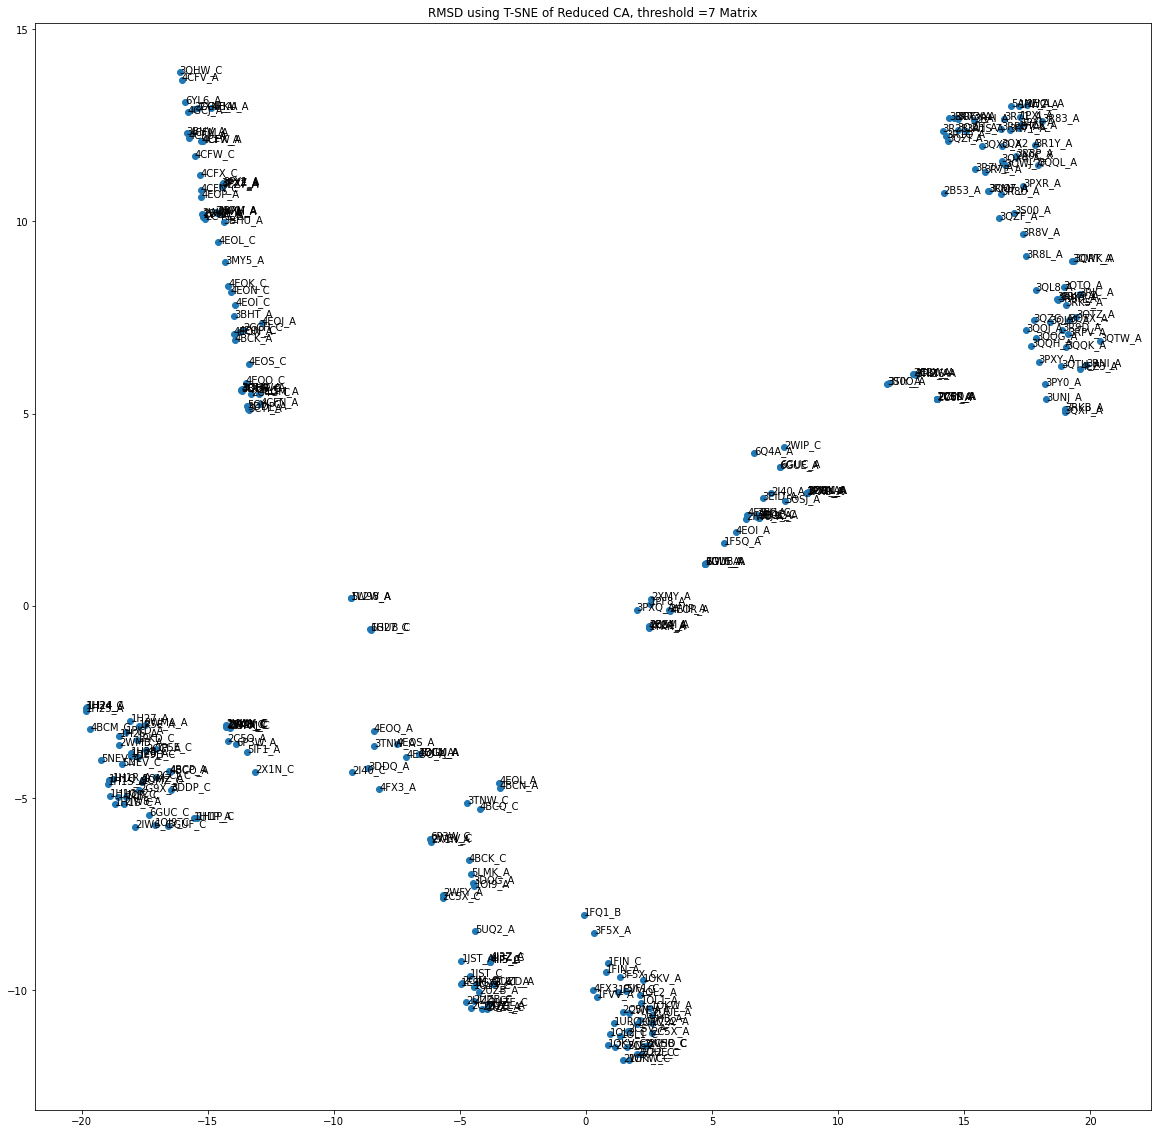

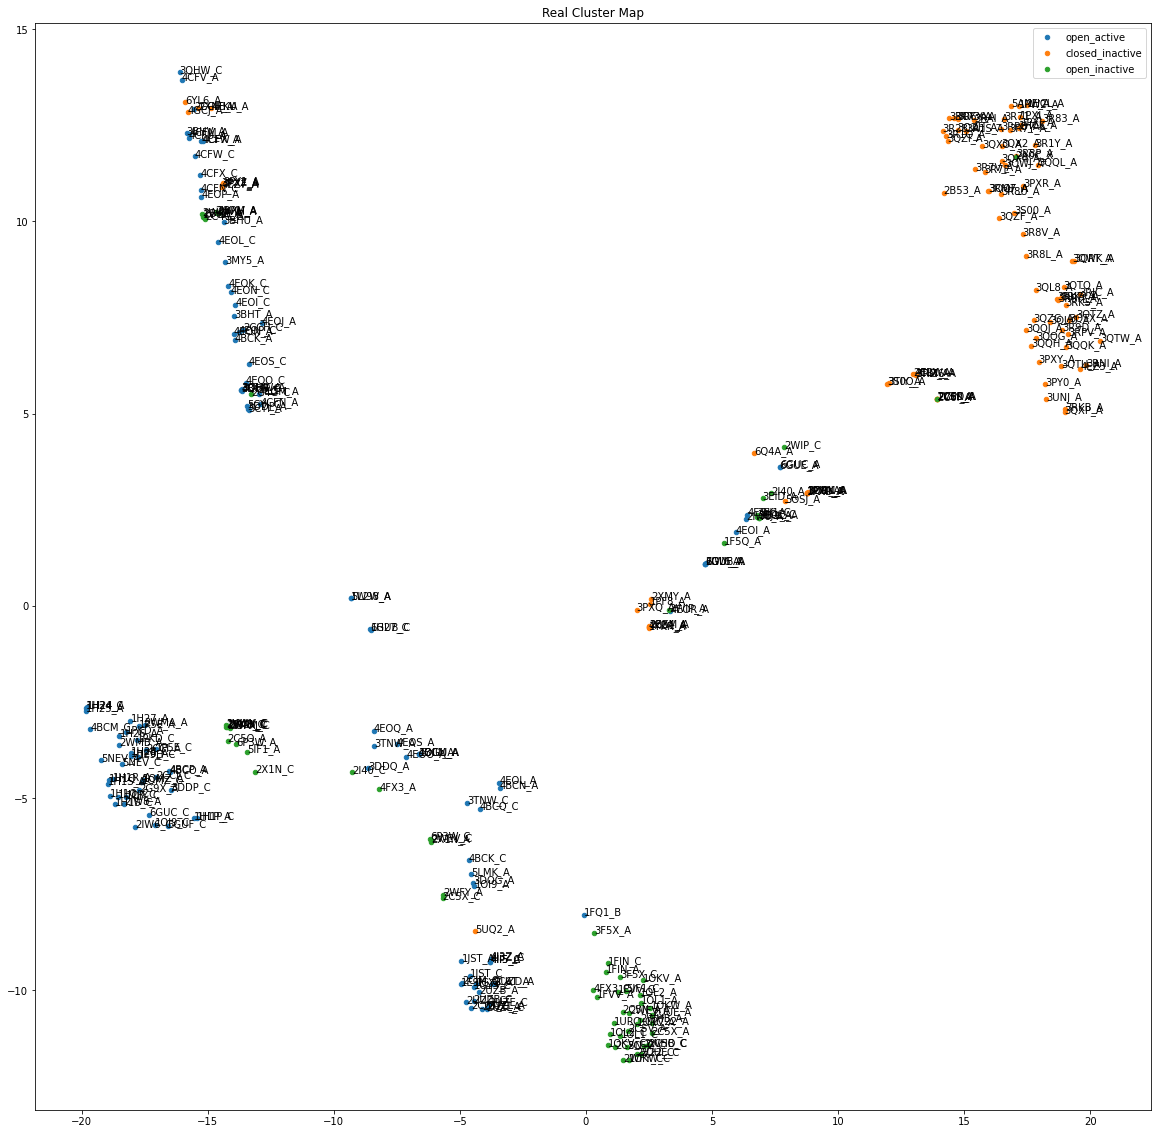

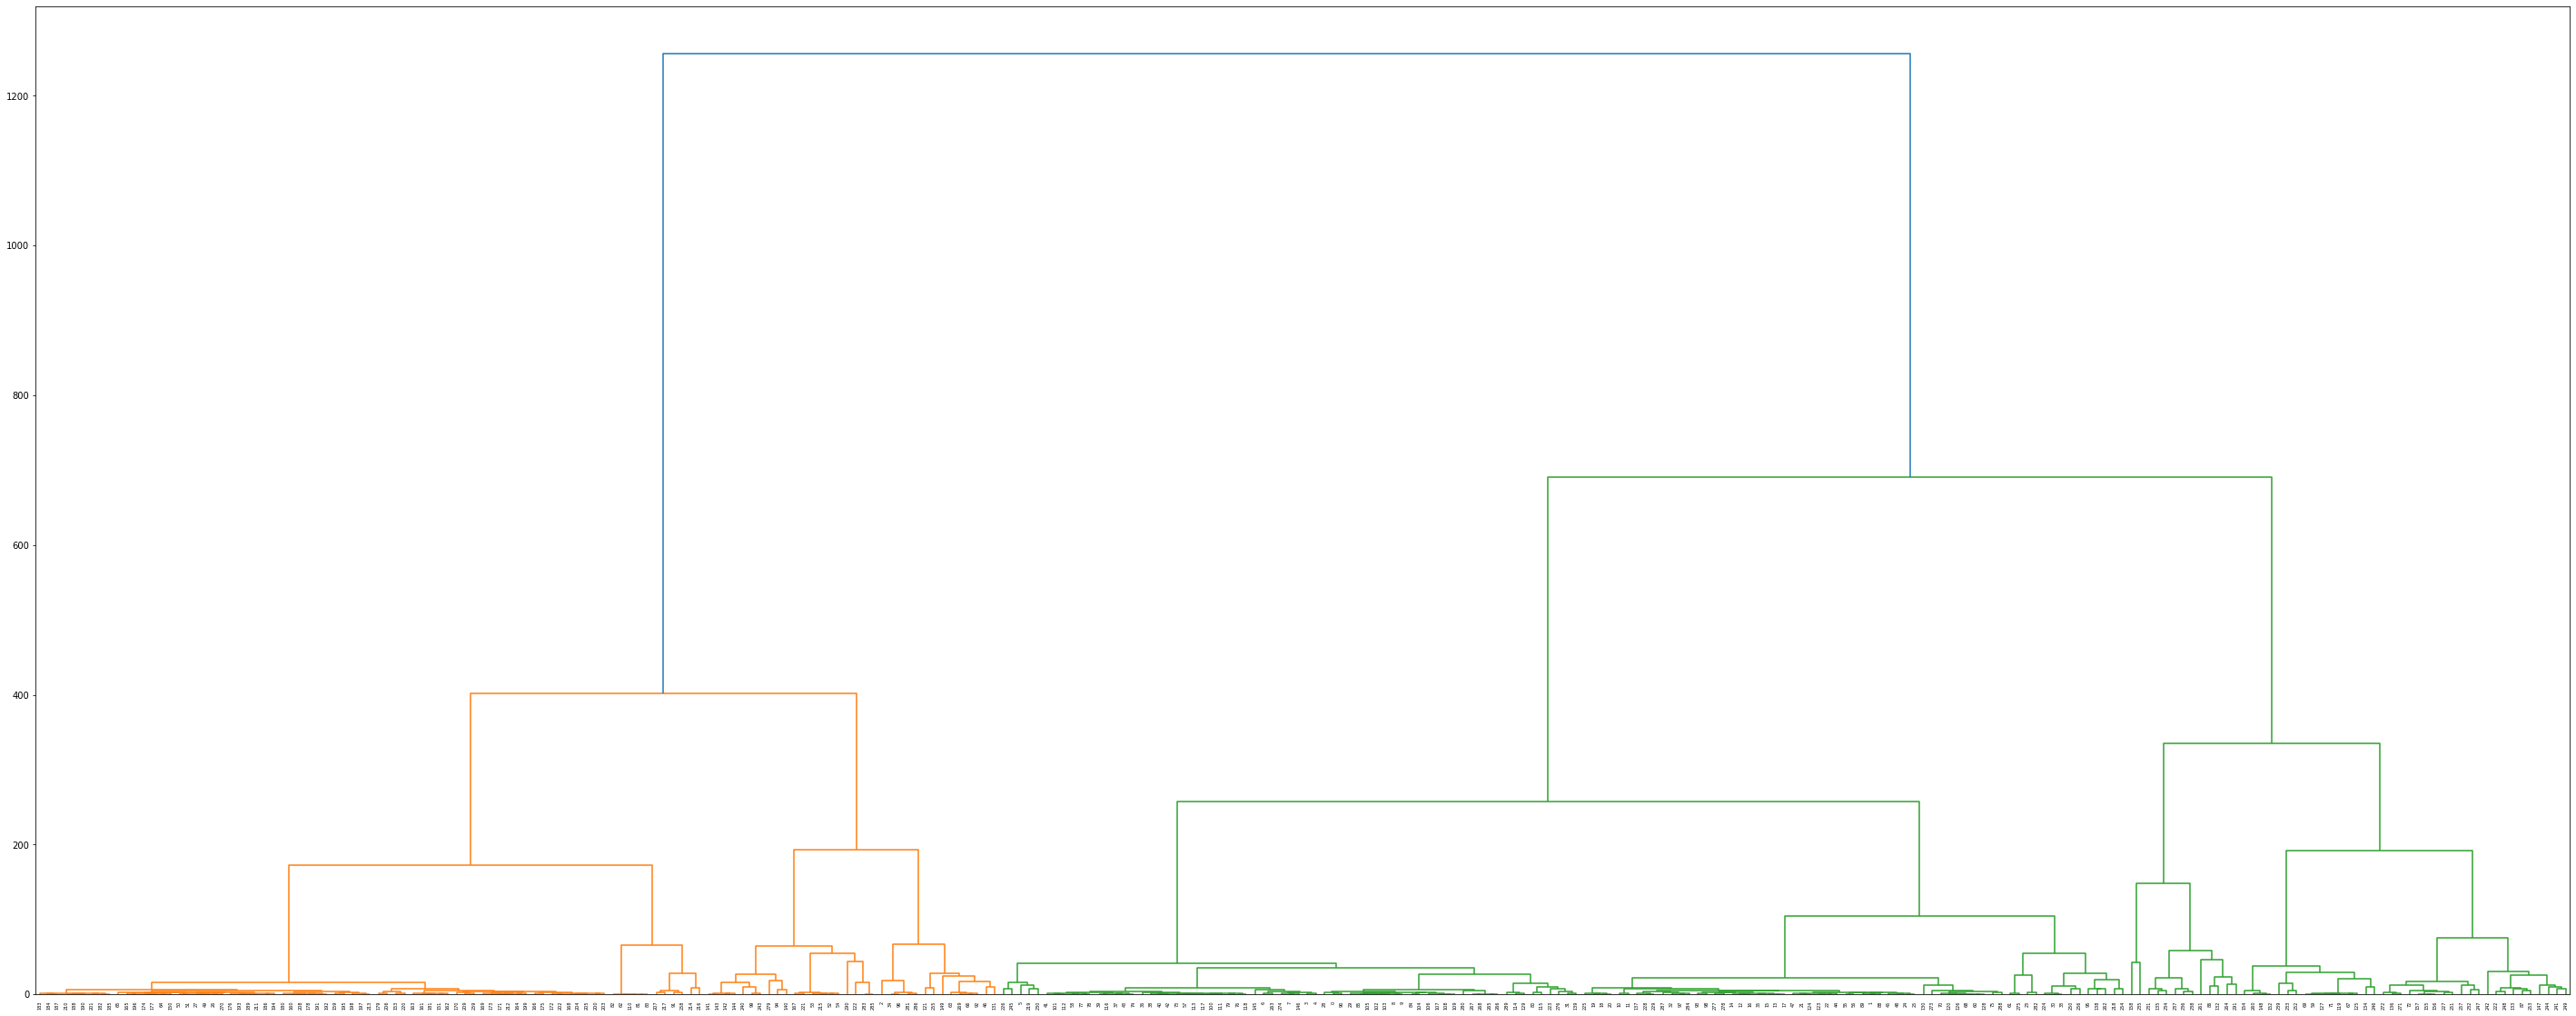

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 130
cluster 1, length: 111
cluster 2, length: 51
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
open_active       0.615385  0.640000  0.627451
closed_inactive   0.810811  0.909091  0.857143
open_inactive     0.156863  0.117647  0.134454
Averages          0.527686  0.555579  0.539683
out:
                            Real open_active  Real closed_inactive  Real open_inactive
Predicted open_active                    80                     1                  49
Predicted closed_inactive                10                    90                  11
Predicted open_inactive                  35                     8                   8
----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


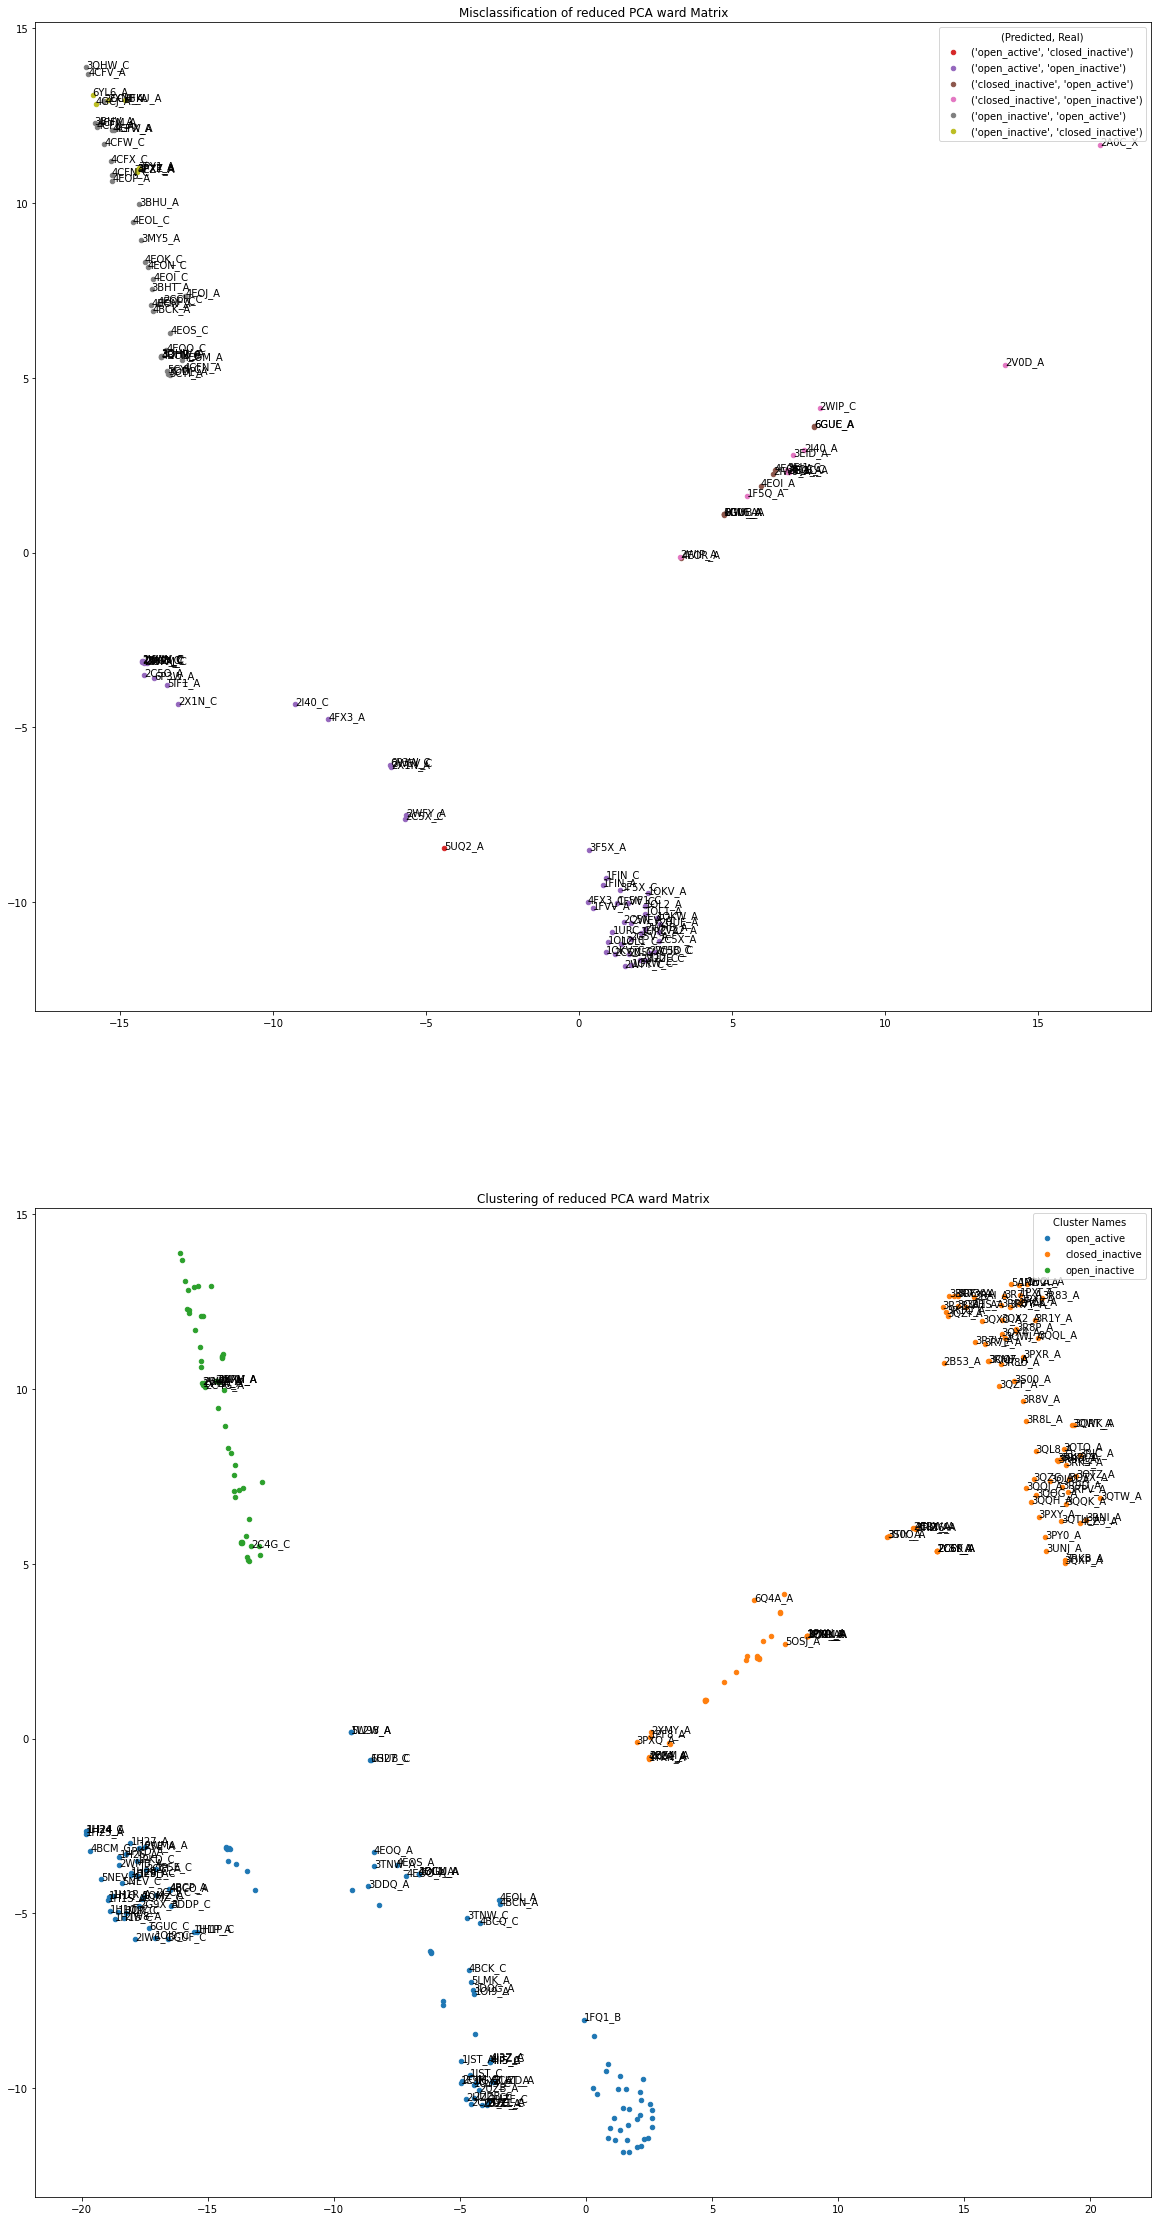

(#missing residues, percentage) [(0, 0.5818181818181818), (1, 0.4946236559139785), (2, 0.625), (3, 0.4444444444444444), (4, 0.10714285714285714), (5, 0.3333333333333333), (6, 0.36363636363636365)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [32, 46, 10, 8, 9, 5, 4]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [55, 93, 16, 18, 84, 15, 11]


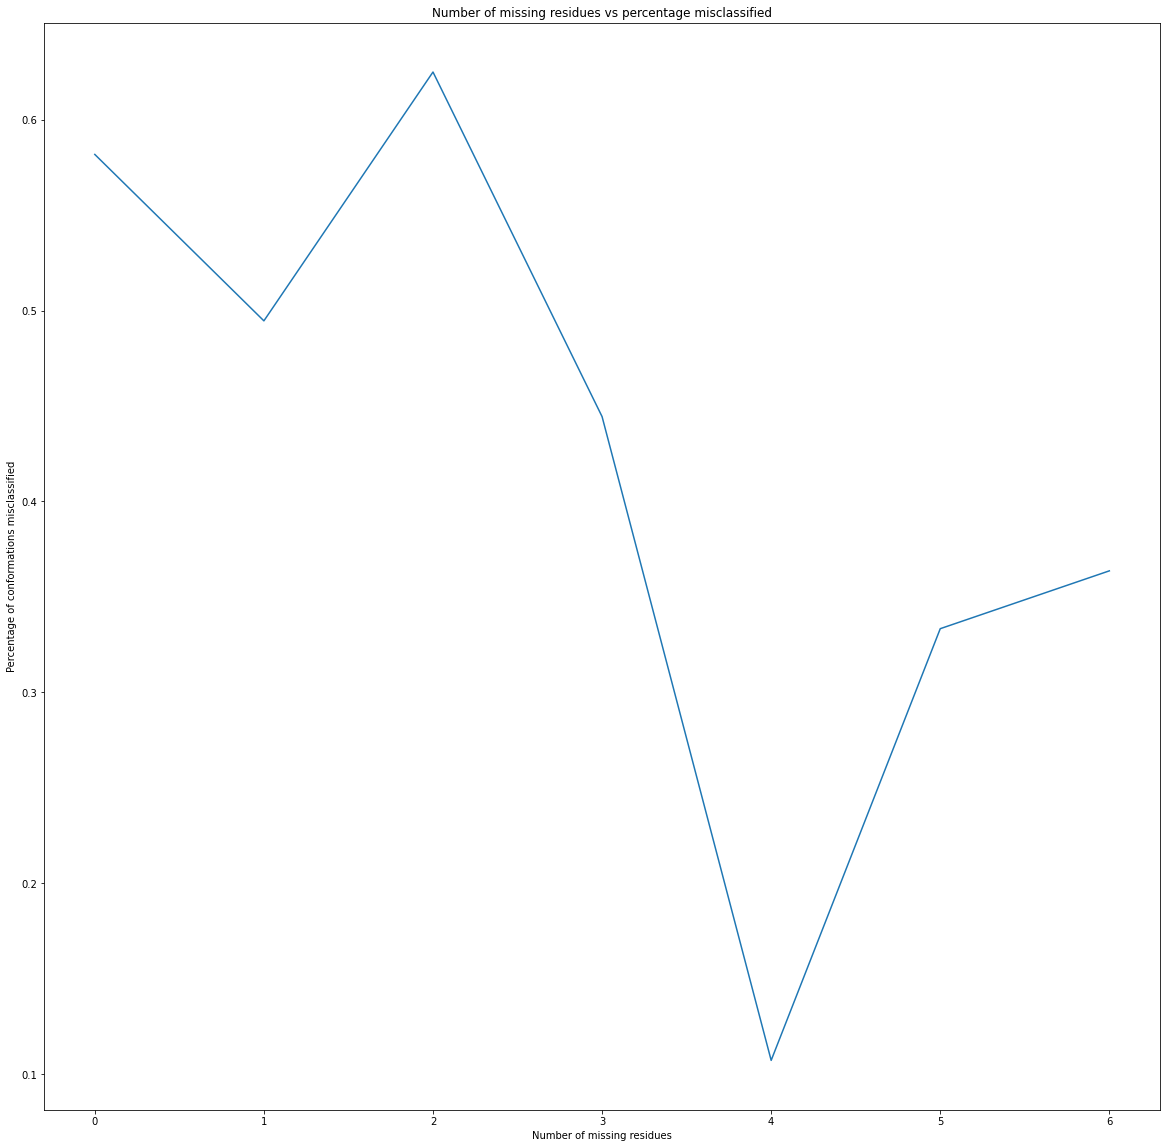

In [ ]:
info(matrix,"Reduced CA, threshold =7", reduced_chains_list,annotated_dict_list, complete=False, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

### Experiment 3
Complete CA and CB RSMD Matrix, T-SNE projection with Ward's algorithm to obtain 3 clusters.
### Analysis:
Slightly improved statistics but not by a huge margin

new matrix shape: (292, 292)
shape axis1: (292,) axis2: (292,)
group: open_active
group: closed_inactive
group: open_inactive


/Users/yao/Desktop/dkp/Work/internship1_bioinfo/helper.py:564: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = linkage(matrix, method = hierarchy_method, metric = dist_metric)


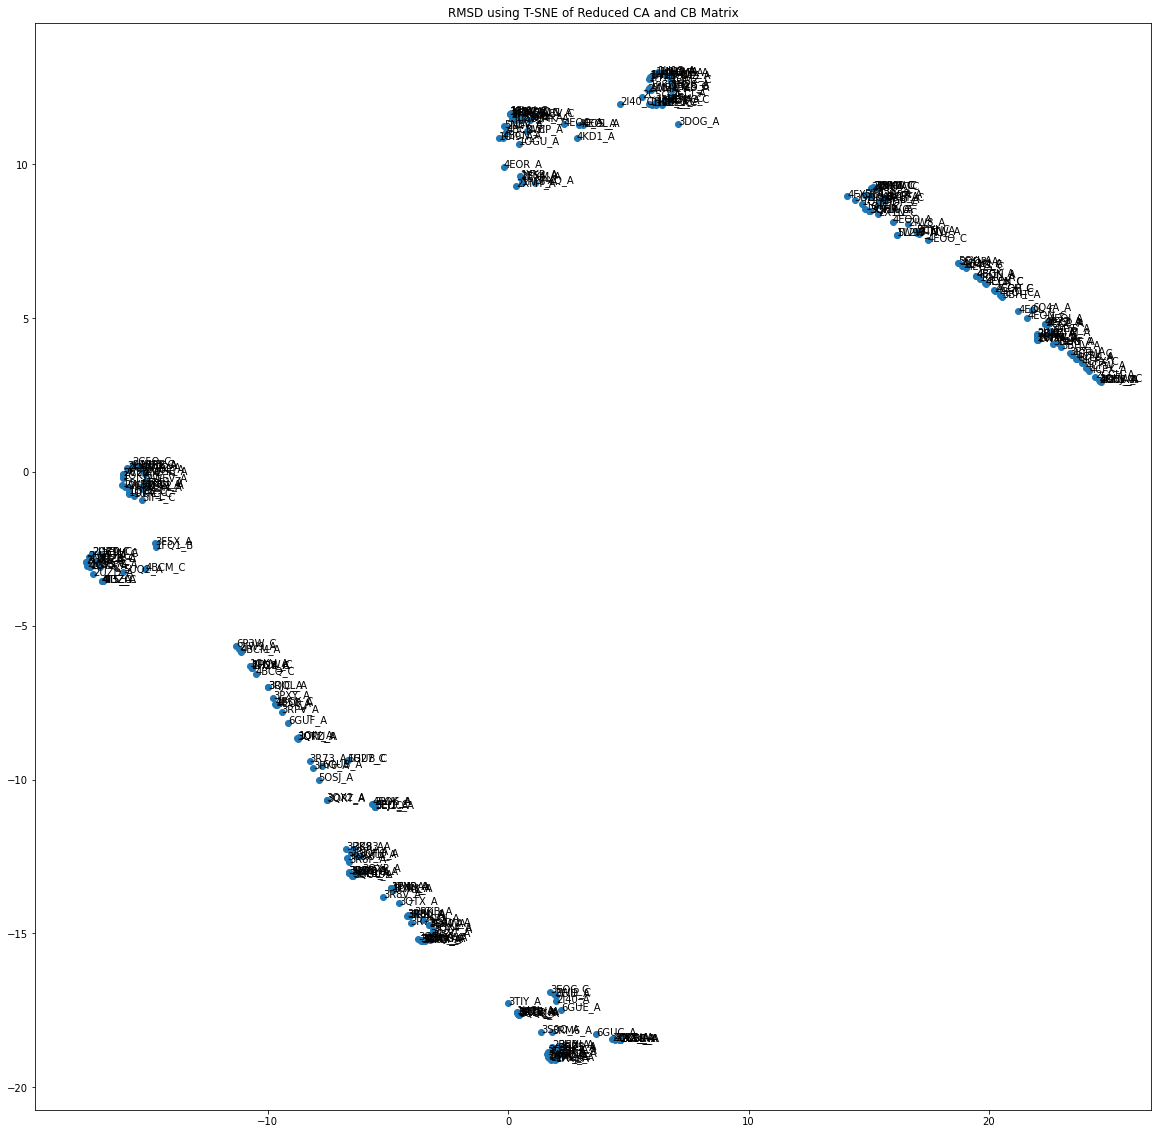

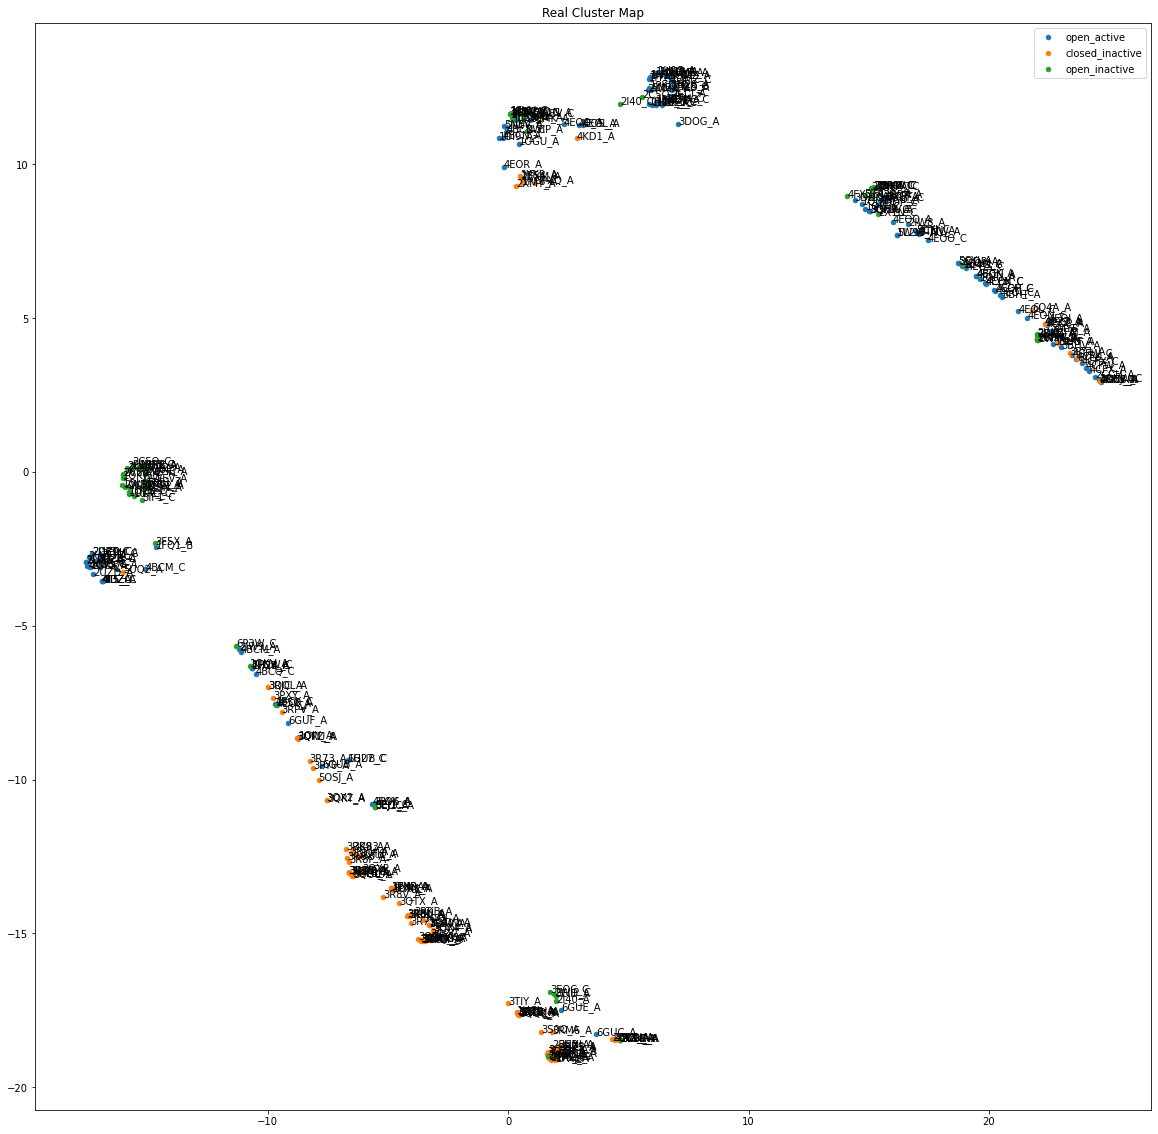

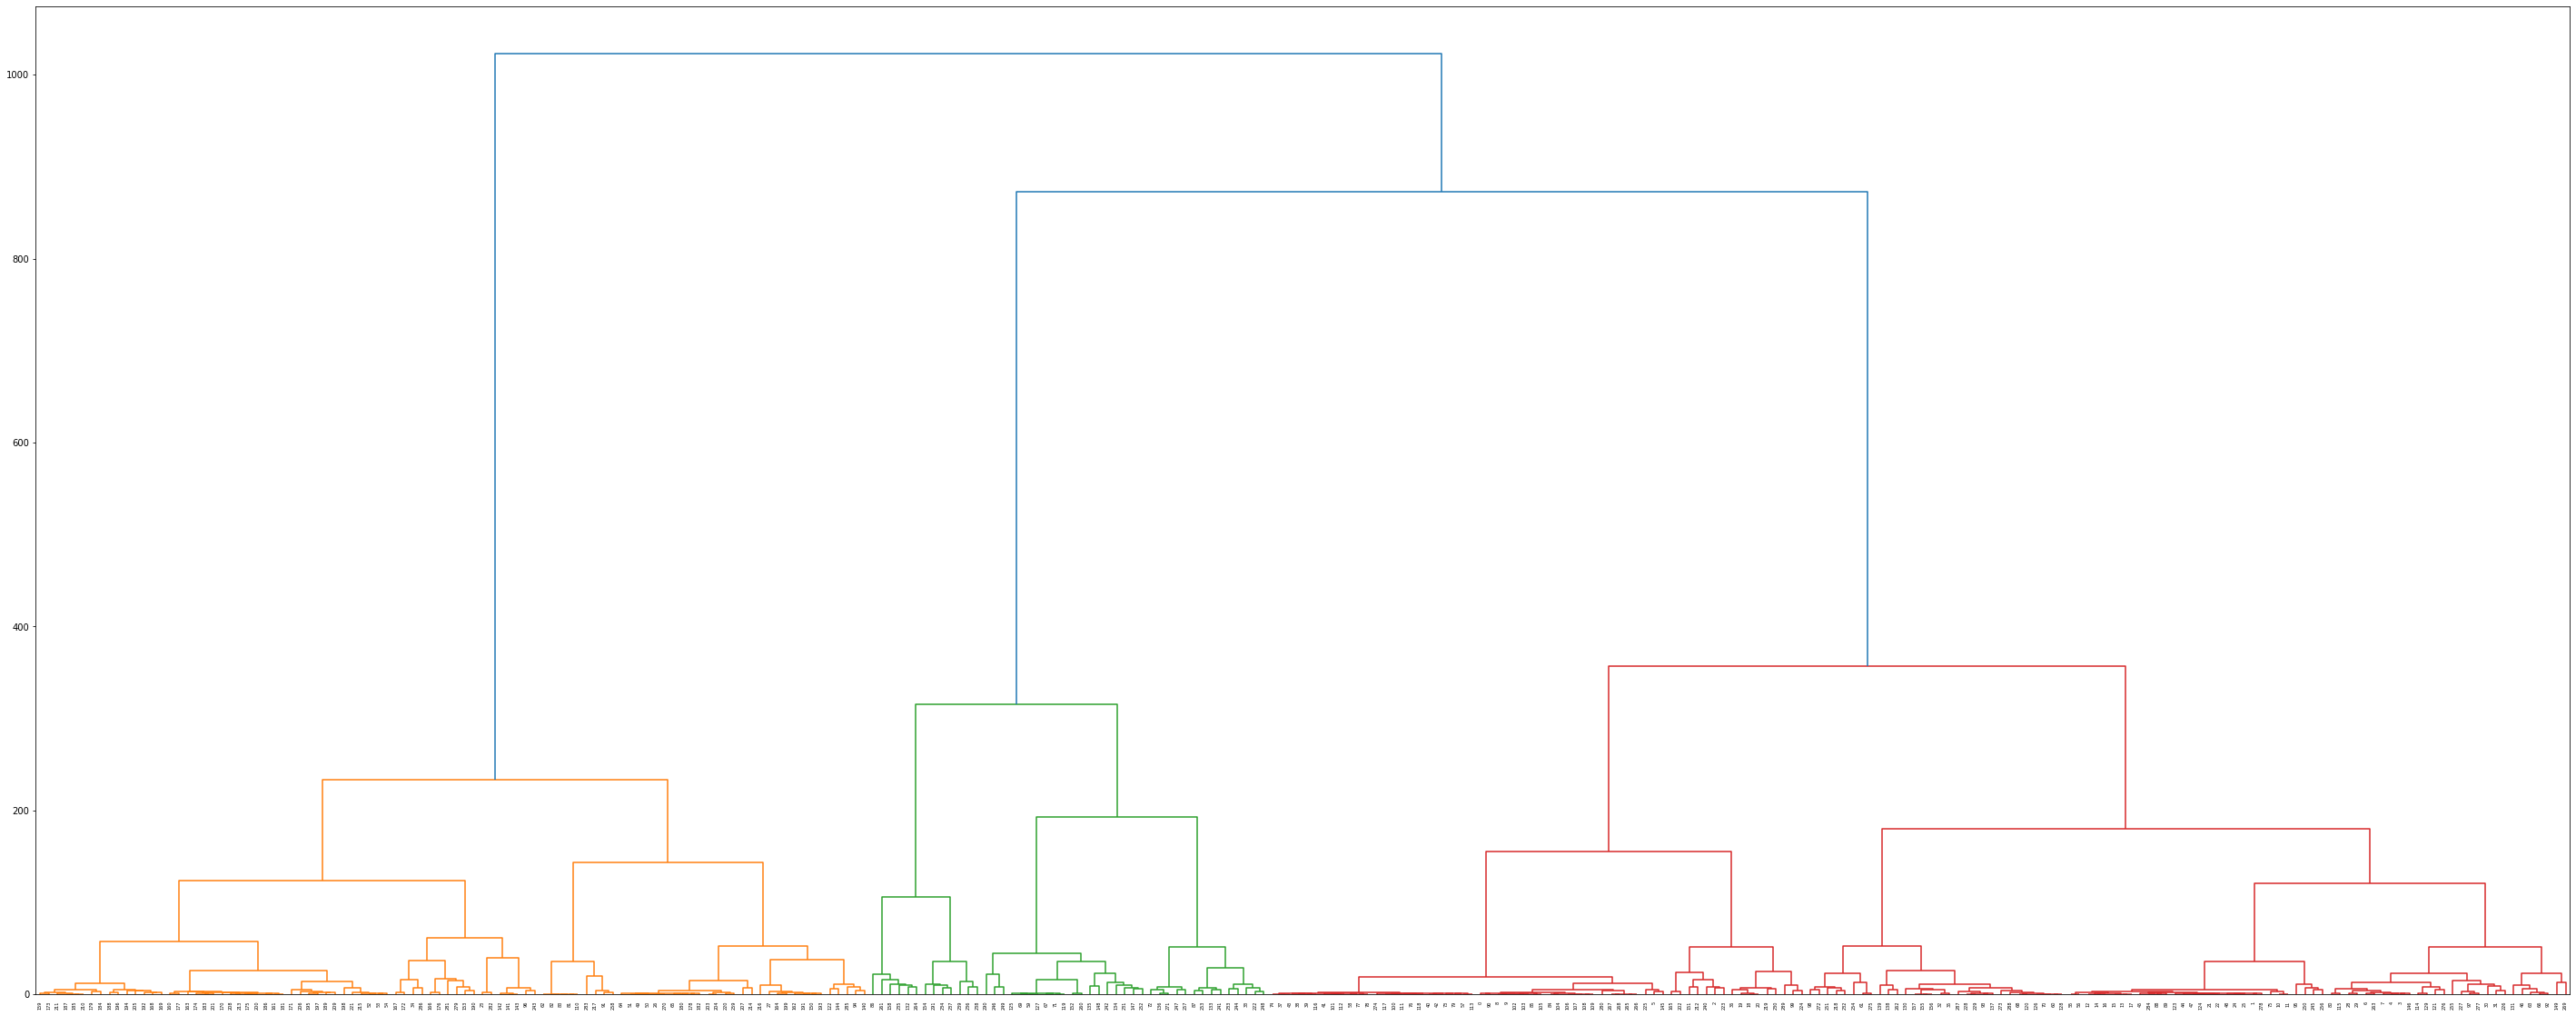

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 150
cluster 1, length: 96
cluster 2, length: 46
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
open_active       0.580000  0.696000  0.632727
closed_inactive   0.812500  0.787879  0.800000
open_inactive     0.173913  0.117647  0.140351
Averages          0.522138  0.533842  0.524359
out:
                            Real open_active  Real closed_inactive  Real open_inactive
Predicted open_active                    87                    12                  51
Predicted closed_inactive                 9                    78                   9
Predicted open_inactive                  29                     9                   8
-----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


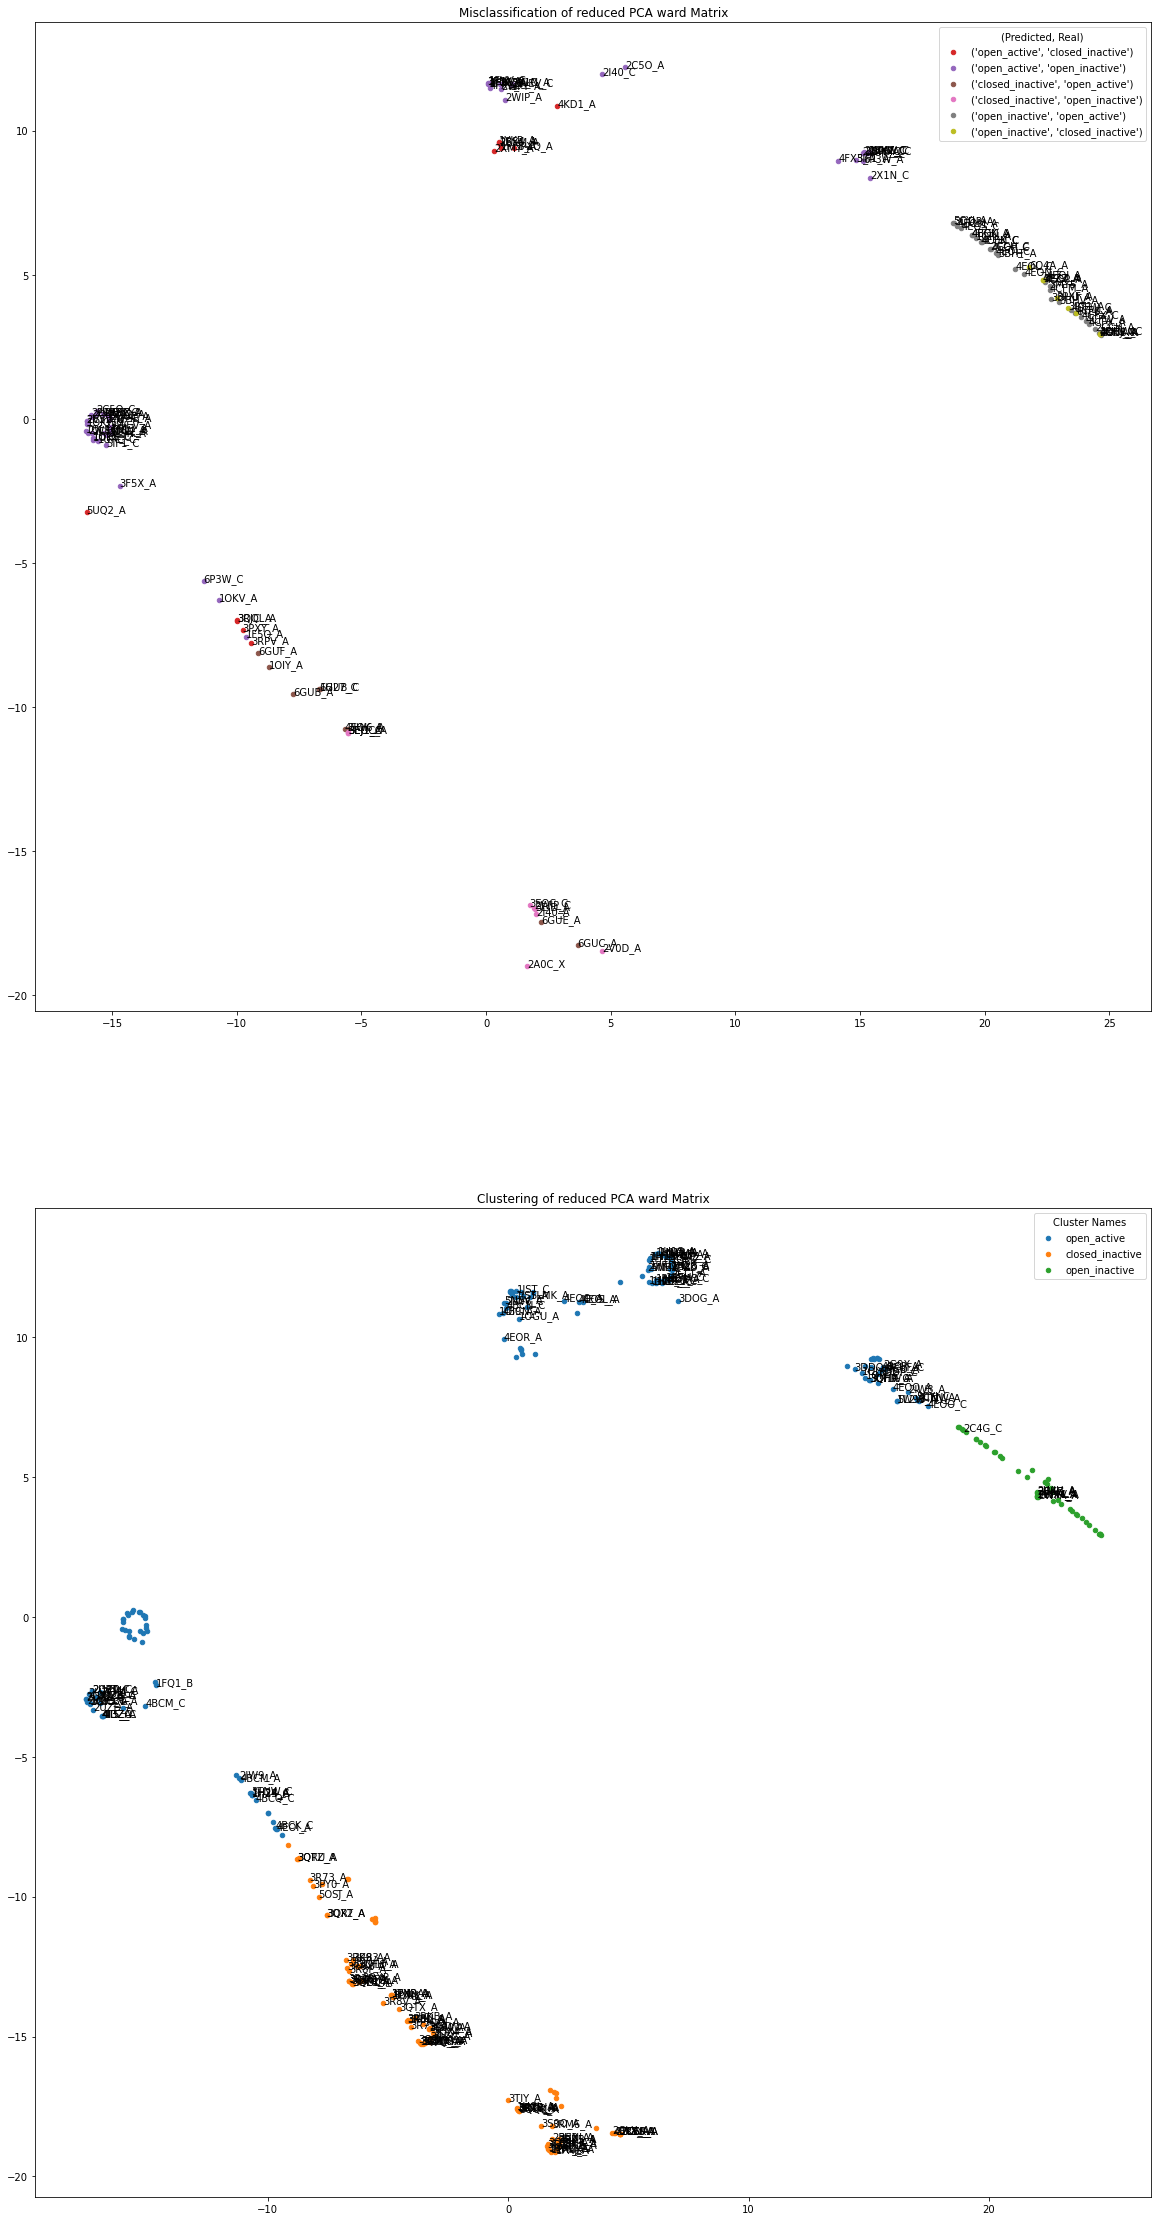

(#missing residues, percentage) [(0, 0.6727272727272727), (1, 0.44086021505376344), (2, 0.625), (3, 0.4444444444444444), (4, 0.13095238095238096), (5, 0.3333333333333333), (6, 0.6363636363636364)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [37, 41, 10, 8, 11, 5, 7]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [55, 93, 16, 18, 84, 15, 11]


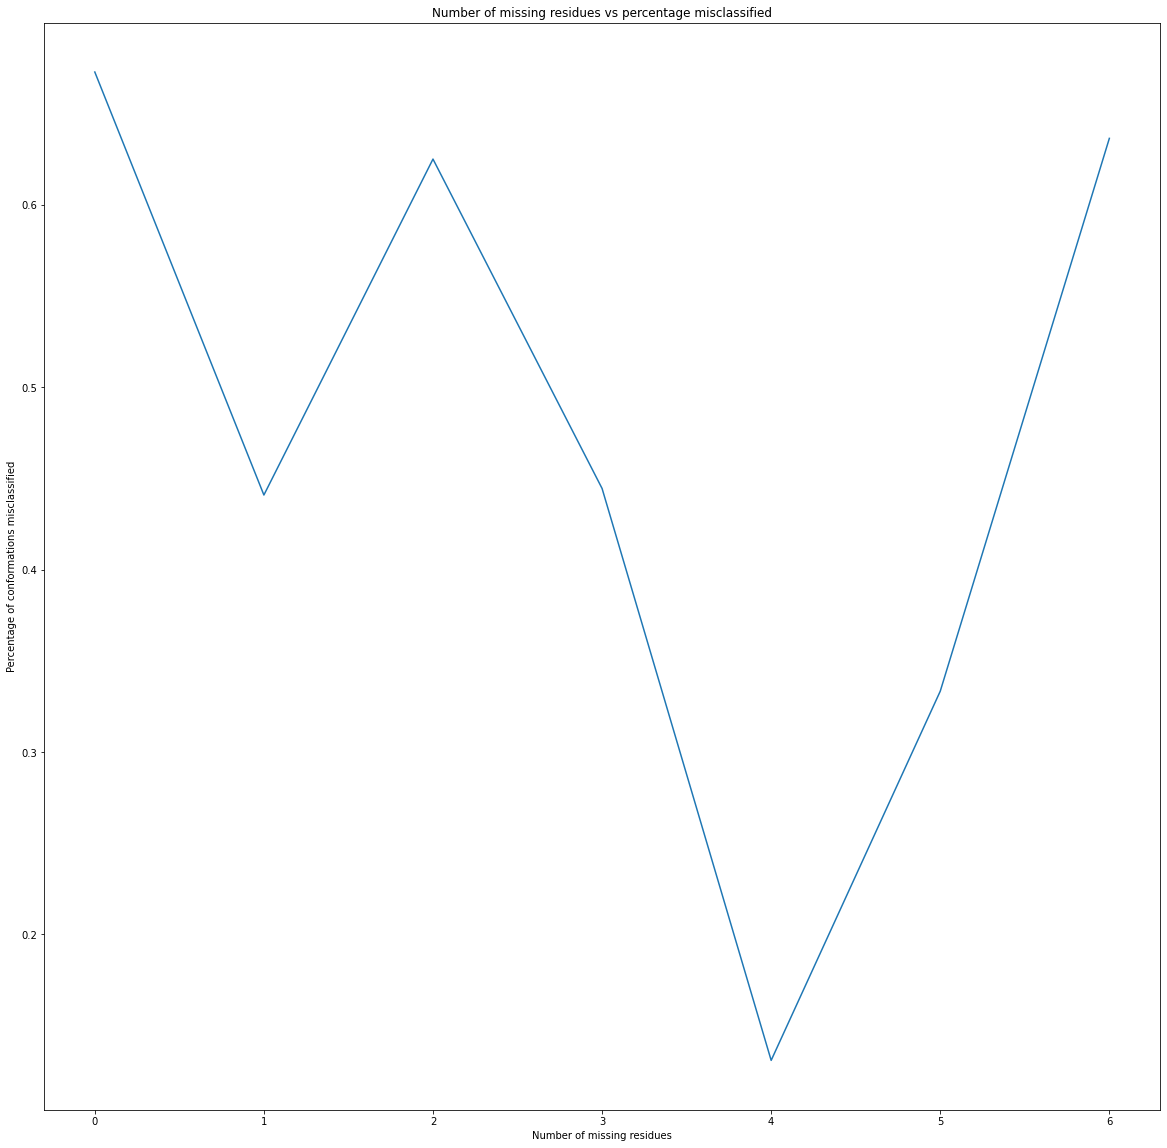

In [ ]:
info(matrix_AB,"Reduced CA and CB", reduced_chains_list,annotated_dict_list,complete= False, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

### Experiment 5
Selected Segments 33 to 44, 150 to 159, found from previous pymol modelling analysis. RSMD Matrix, T-SNE projection with Ward's algorithm to obtain 3 clusters.

### Analysis:

new matrix shape: (292, 292)
shape axis1: (292,) axis2: (292,)
group: open_active
group: closed_inactive
group: open_inactive


/Users/yao/Desktop/dkp/Work/internship1_bioinfo/helper.py:564: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = linkage(matrix, method = hierarchy_method, metric = dist_metric)


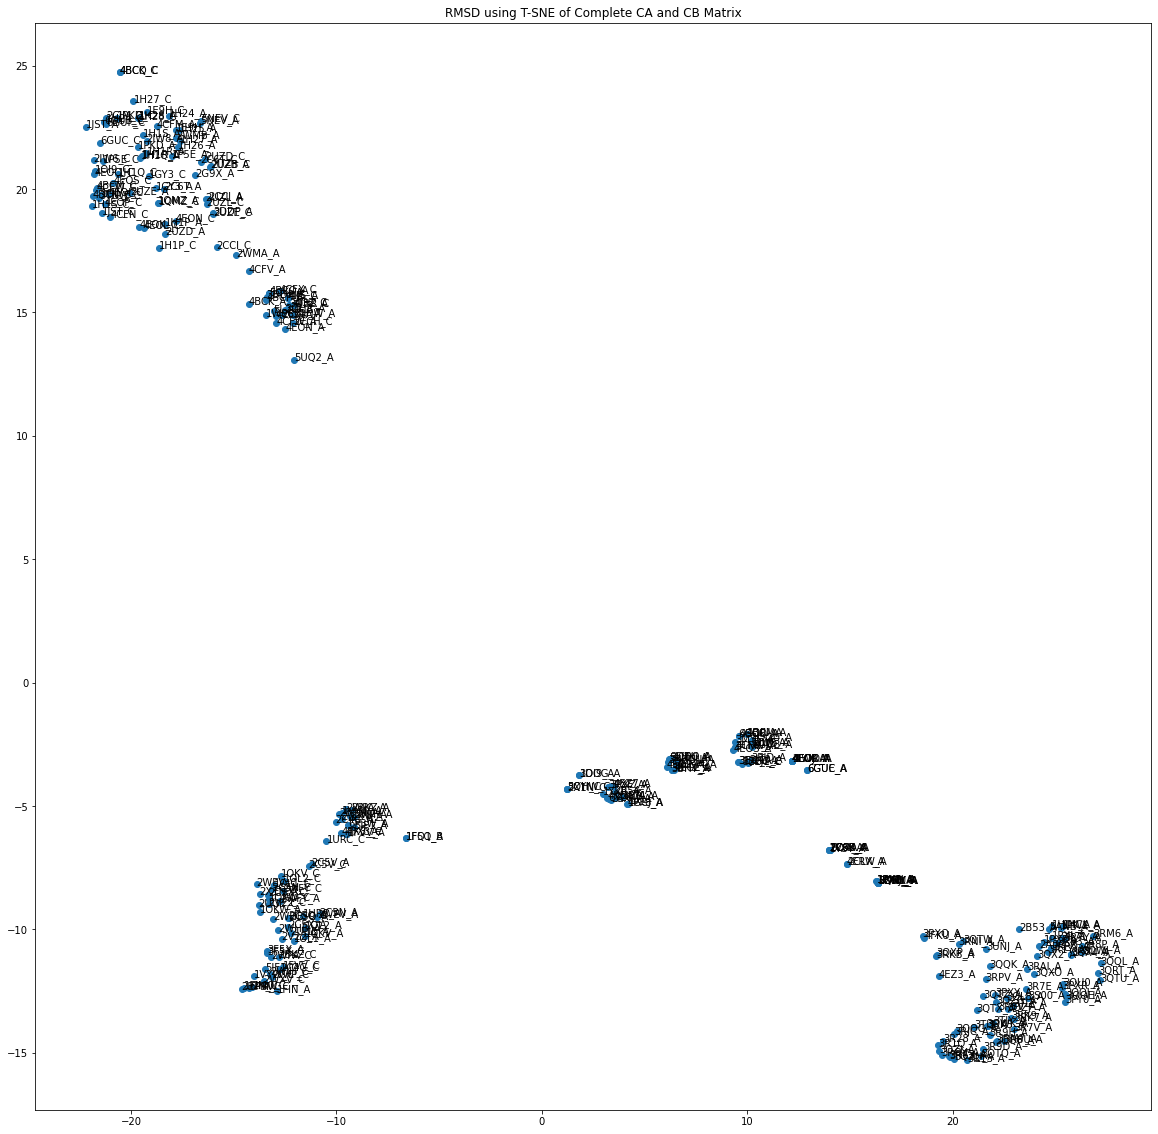

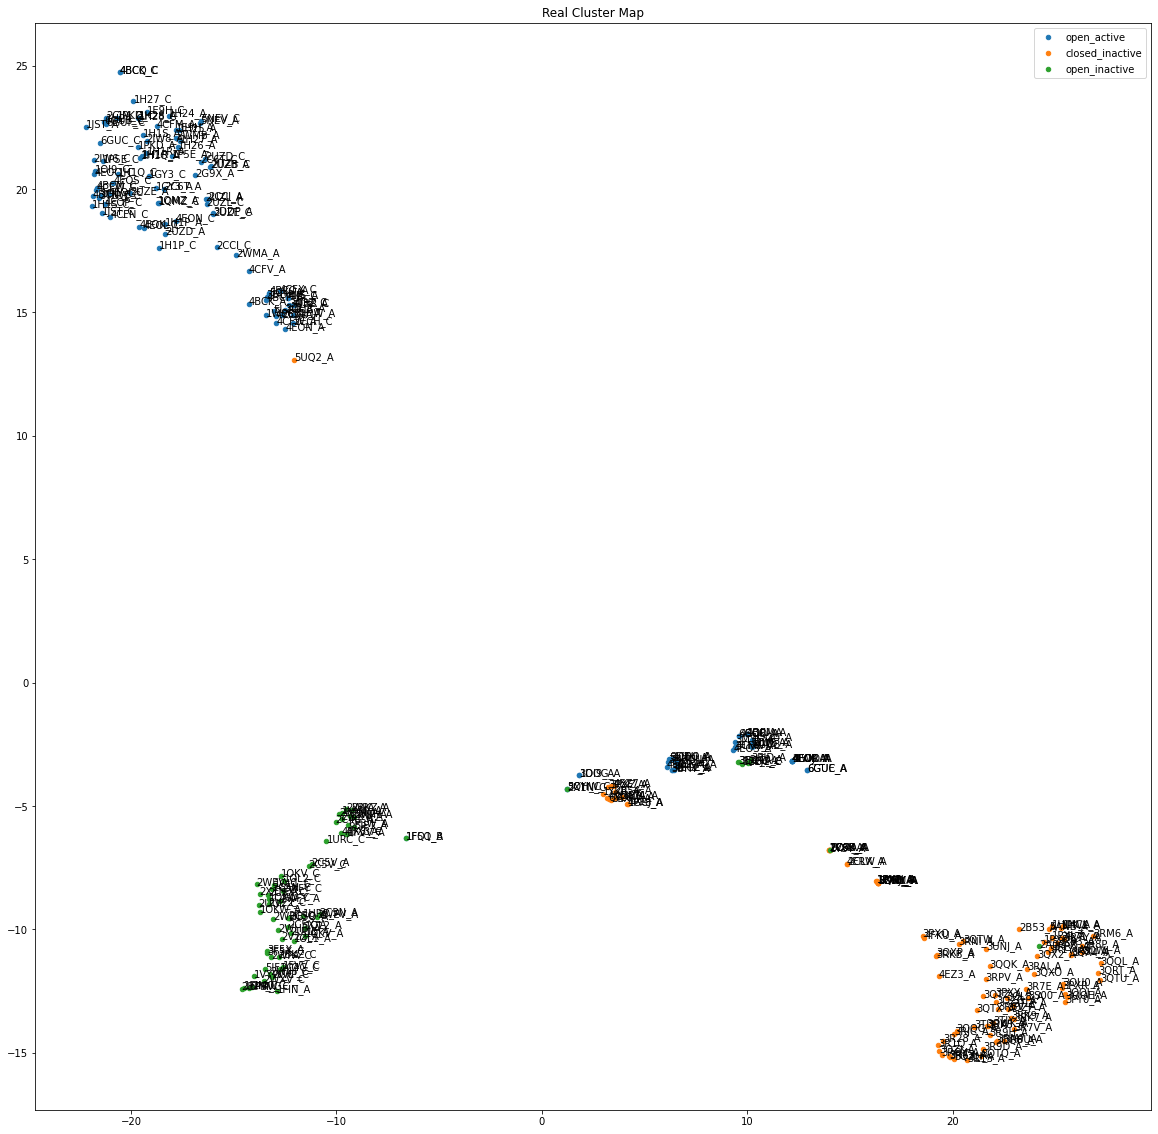

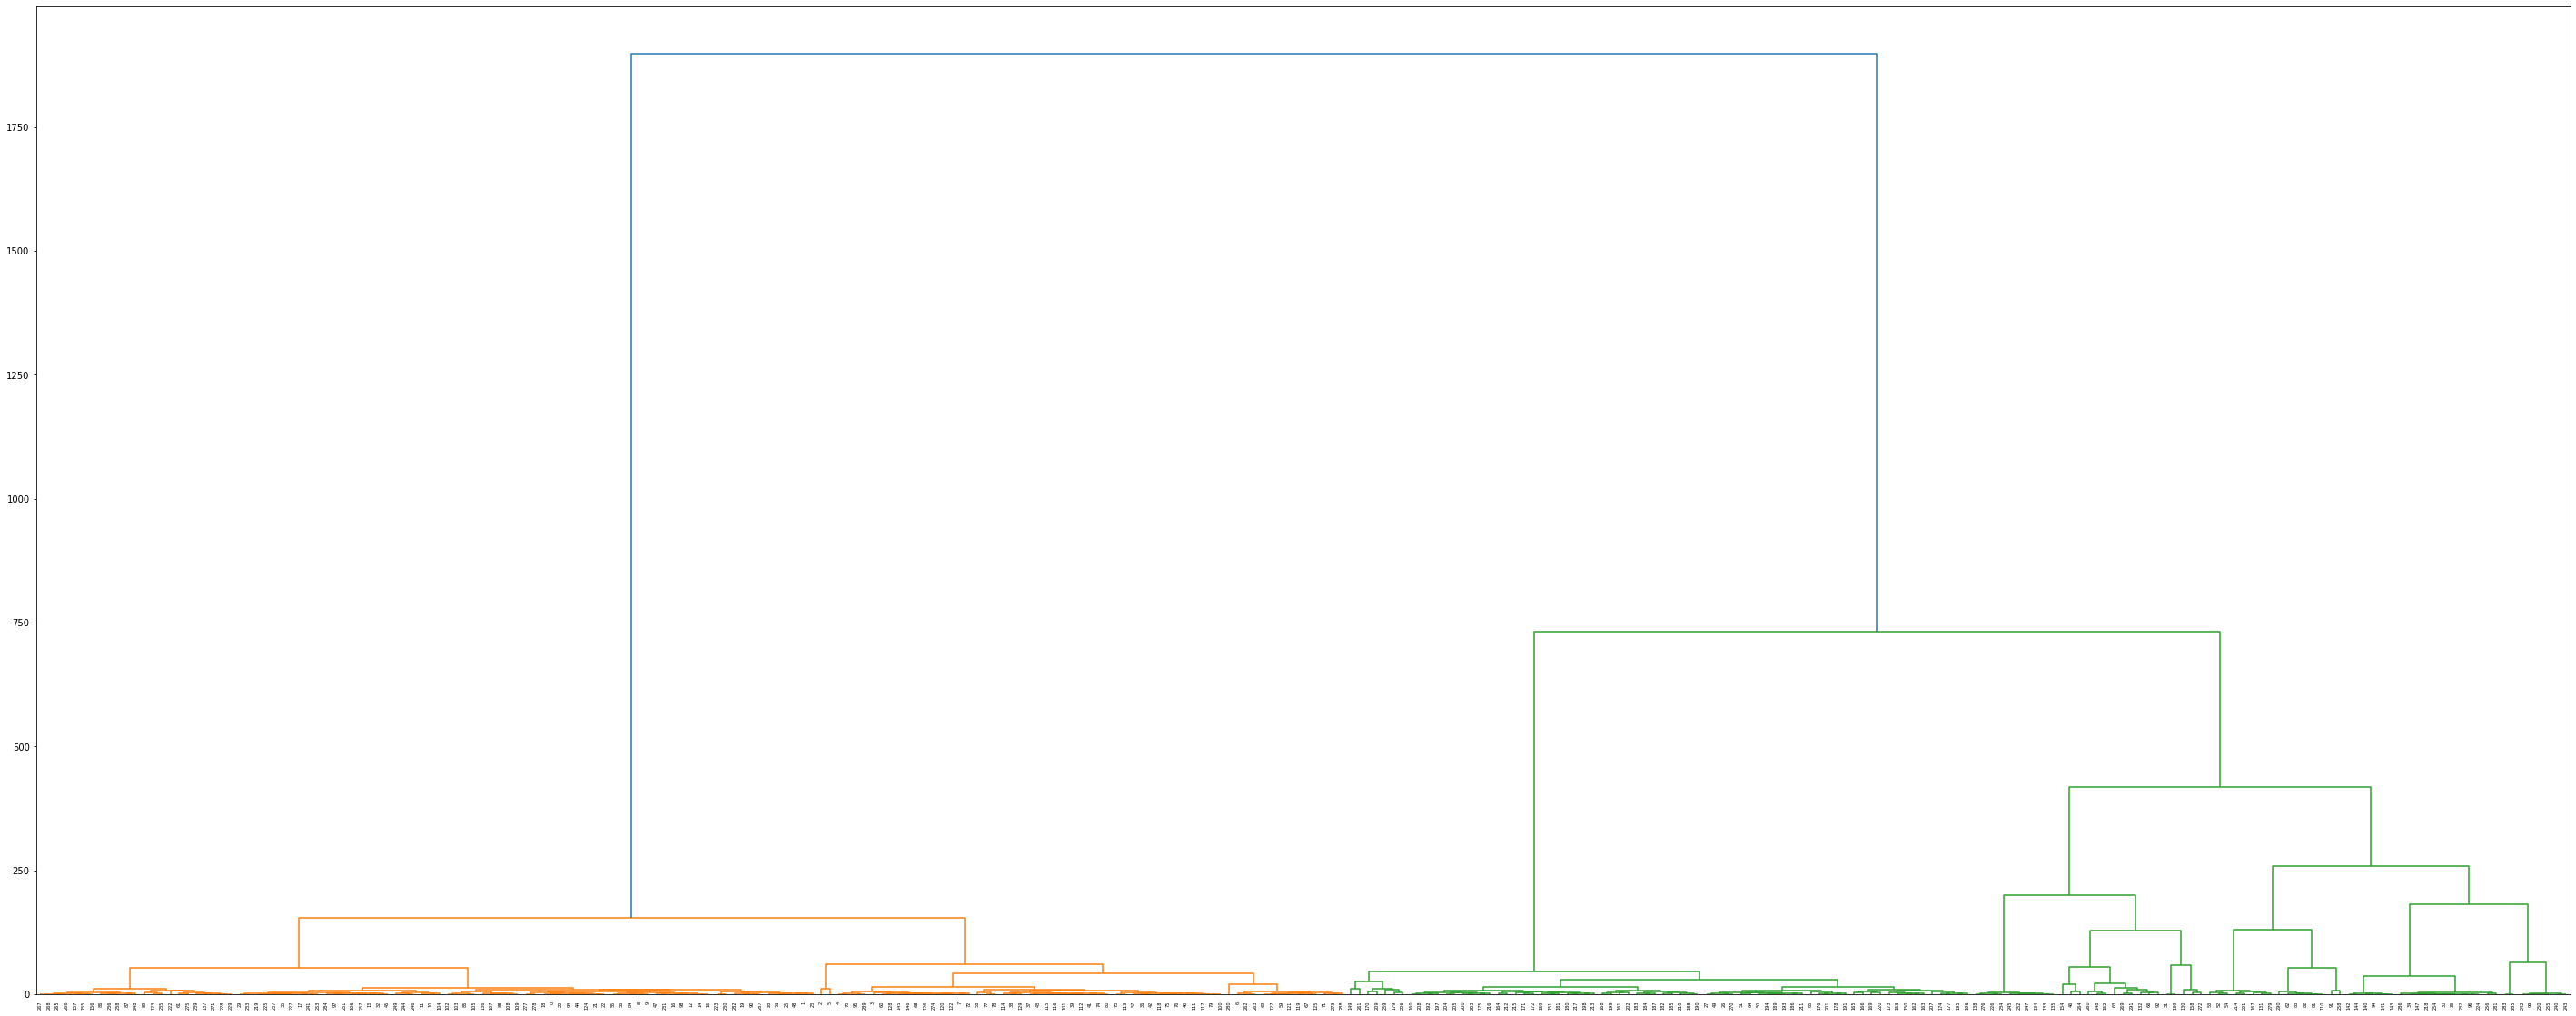

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 151
cluster 1, length: 72
cluster 2, length: 69
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
open_active       0.602649  0.728000  0.659420
closed_inactive   0.986111  0.717172  0.830409
open_inactive     0.115942  0.117647  0.116788
Averages          0.568234  0.520940  0.535539
out:
                            Real open_active  Real closed_inactive  Real open_inactive
Predicted open_active                    91                     1                  59
Predicted closed_inactive                 0                    71                   1
Predicted open_inactive                  34                    27                   8
-----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


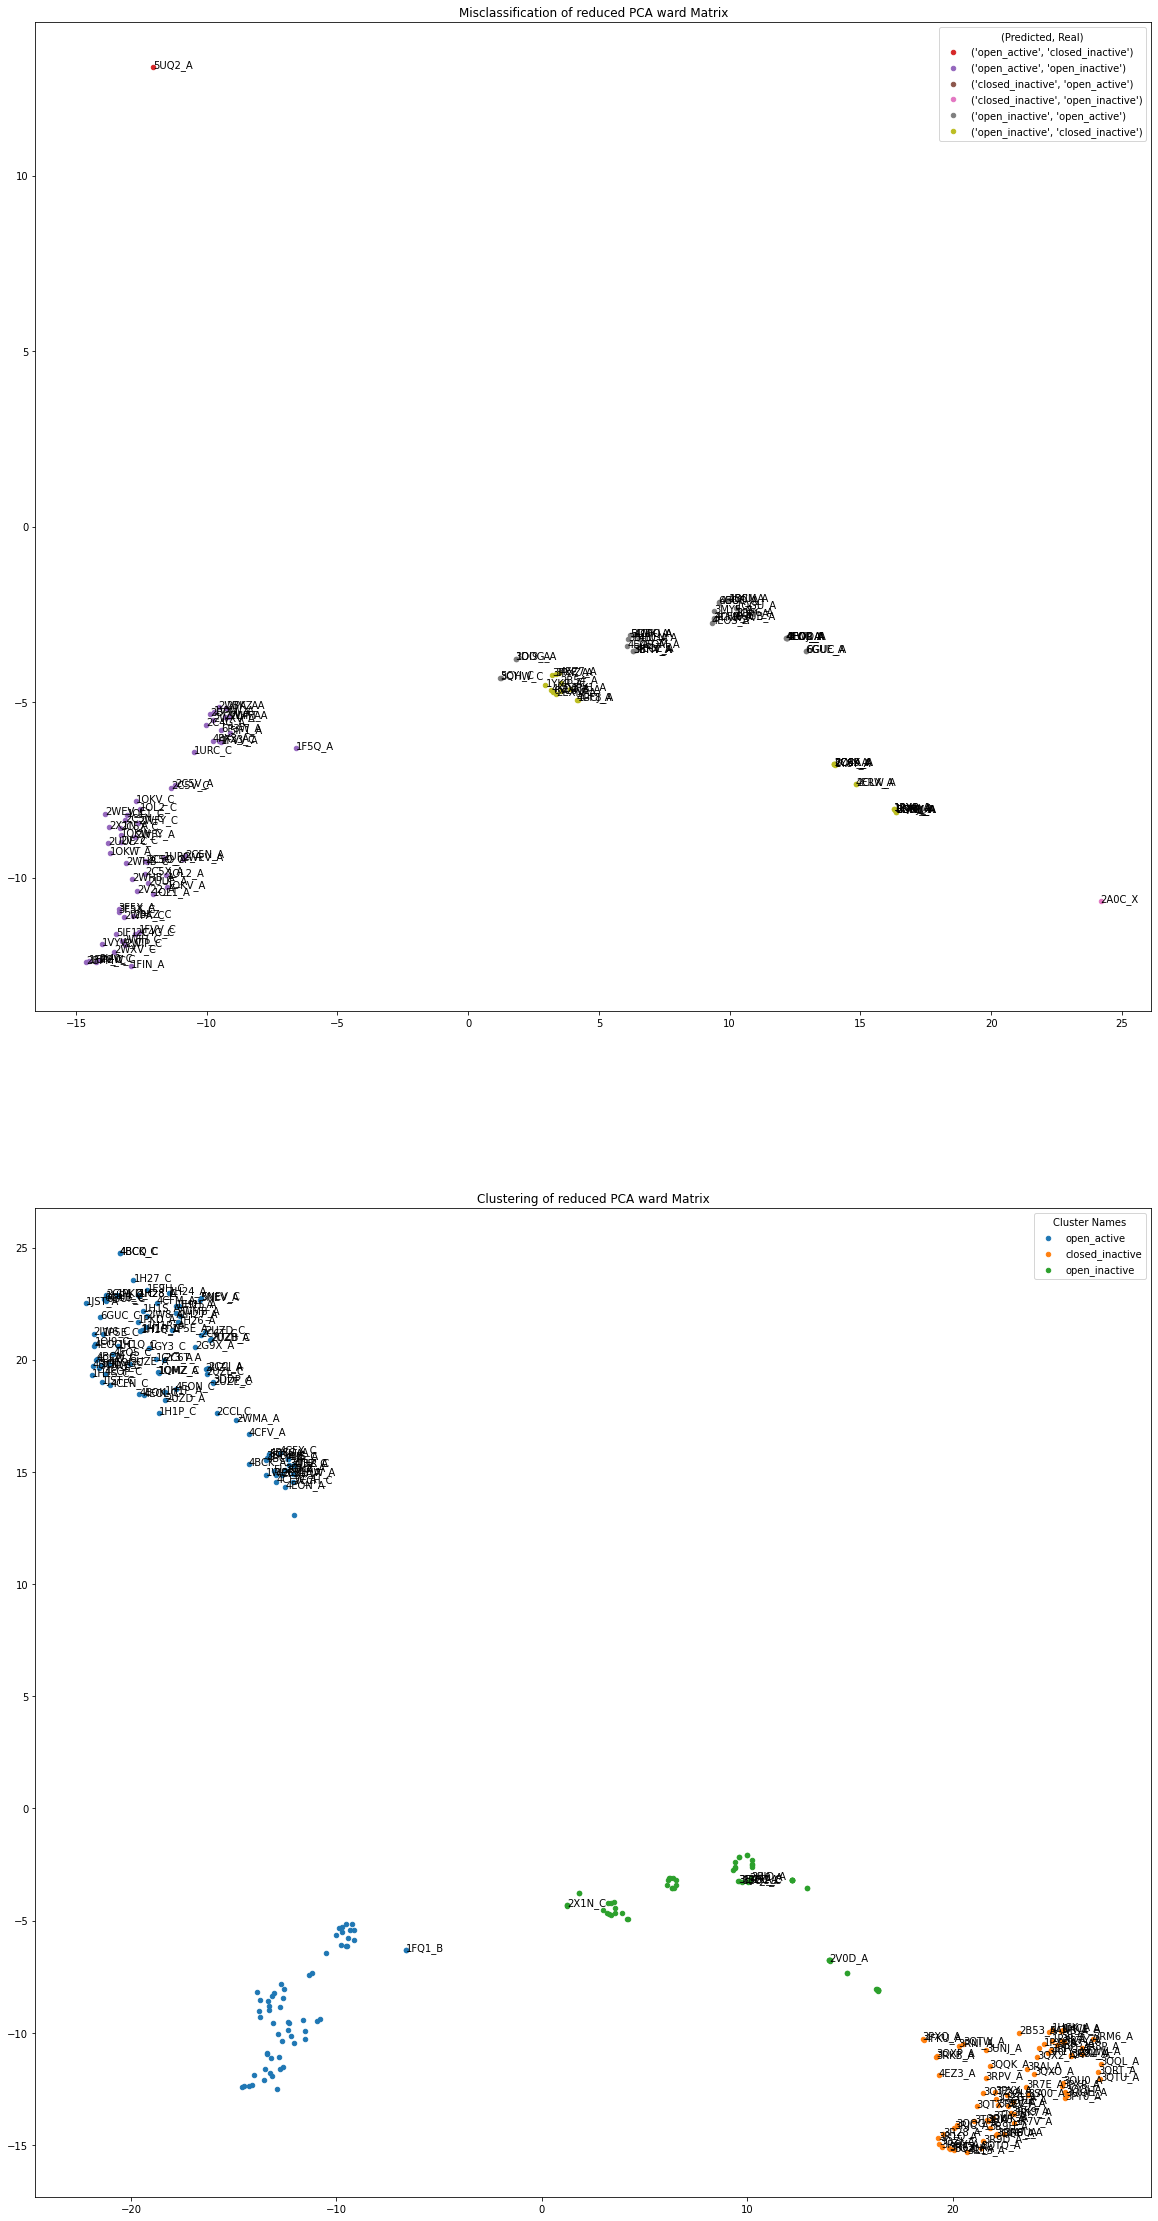

(#missing residues, percentage) [(0, 0.6181818181818182), (1, 0.3763440860215054), (2, 0.875), (3, 0.6666666666666666), (4, 0.15476190476190477), (5, 0.4666666666666667), (6, 0.6363636363636364)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [34, 35, 14, 12, 13, 7, 7]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [55, 93, 16, 18, 84, 15, 11]


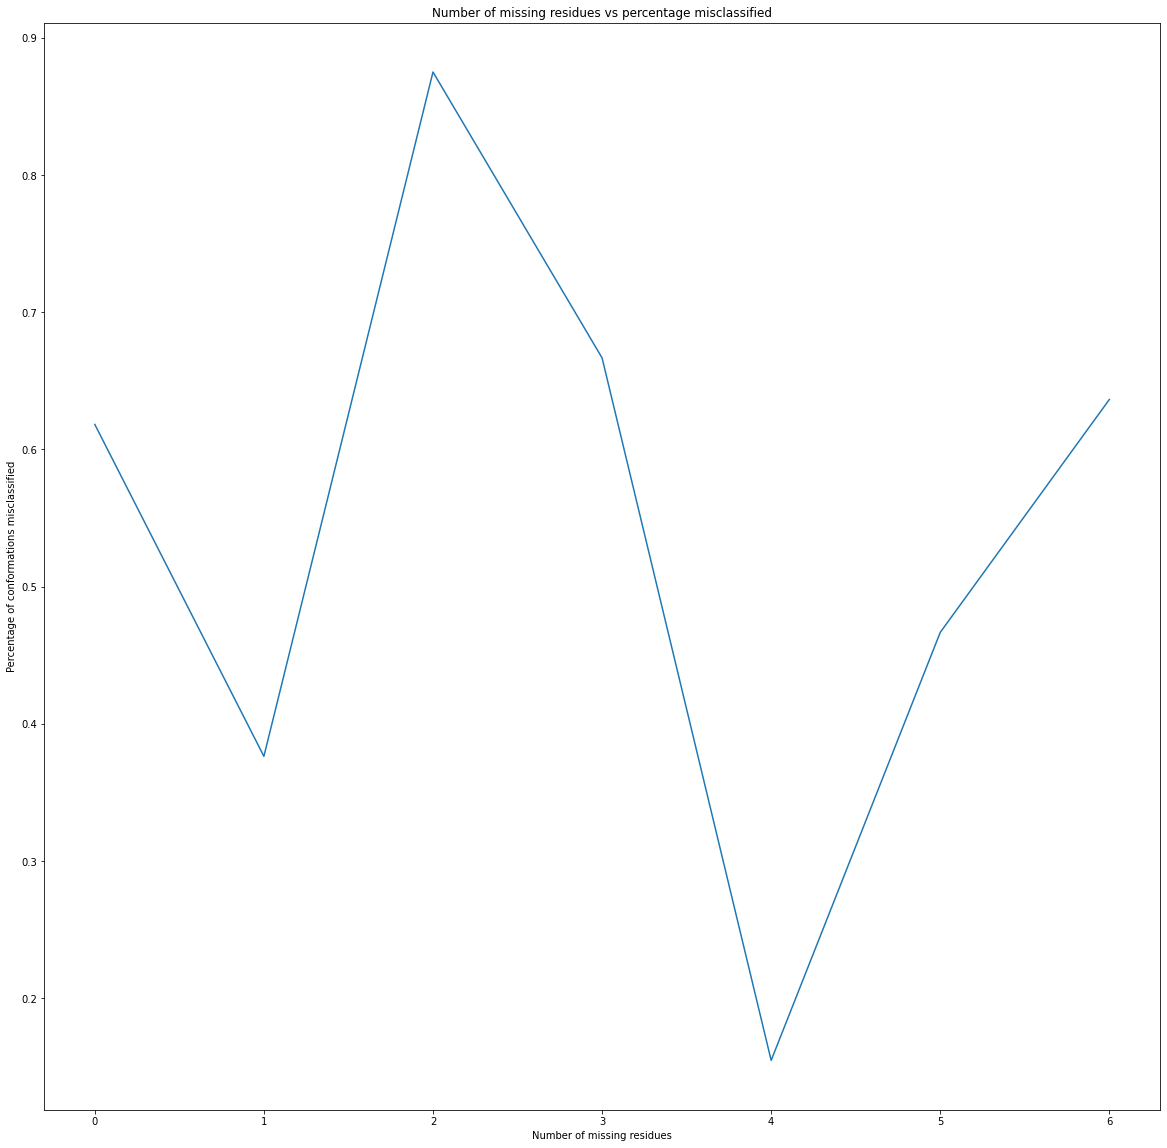

In [ ]:
info(matrix_seg,"Complete CA and CB", reduced_chains_list,annotated_dict_list,complete= False, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

### Experiment 6 less intuitive partition
Selected Segments 33 to 44, 150 to 159, found from previous pymol modelling analysis. T-SNE projection with Ward's algorithm to obtain 3 clusters, Manual Tree parititioning, Cluster1 = Tree.left.left, Cluster2 = Tree.left.right, Cluster3 = Tree.right
## Analysis:
Much worse than the previous, without the threshold filter. It can be seen that the clusters are actually really well mixed in the real cluster map, thus rendering the intuitive clustering algorithms ineffective 

In [ ]:
threshold_remove(7,segments= [(32,43),(149,158)])

Threshold: 7 amount removed: 176


([[[array([[  6.0942745, -14.260595 , -22.973621 ]], dtype=float32),
    array([[  4.1951075, -10.956415 , -23.174686 ]], dtype=float32),
    array([[  3.3086321,  -9.904343 , -19.619509 ]], dtype=float32),
    array([[  1.1193738,  -6.7864246, -19.86776  ]], dtype=float32),
    array([[  2.7110813,  -4.3827534, -17.371422 ]], dtype=float32),
    array([[ -0.19173908,  -1.9978371 , -16.731144  ]], dtype=float32),
    array([[  0.6434722 ,  -0.94828415, -13.147404  ]], dtype=float32),
    None,
    None,
    None,
    None,
    None],
   [array([[  8.450831, -12.486206,  -5.946808]], dtype=float32),
    array([[ 7.900812 , -9.4837265, -8.202068 ]], dtype=float32),
    array([[  4.4150243, -10.259495 ,  -9.491165 ]], dtype=float32),
    array([[  3.0091763, -12.489431 ,  -6.687526 ]], dtype=float32),
    array([[  0.7358637, -15.402567 ,  -7.672561 ]], dtype=float32),
    array([[ -3.0491204, -14.558998 ,  -7.8120522]], dtype=float32),
    array([[ -6.3852344, -16.304893 ,  -7.165566 ]],

new matrix shape: (355, 355)
shape axis1: (355,) axis2: (355,)
group: open_active
group: closed_inactive
group: open_inactive


/Users/yao/Desktop/dkp/Work/internship1_bioinfo/helper.py:564: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = linkage(matrix, method = hierarchy_method, metric = dist_metric)


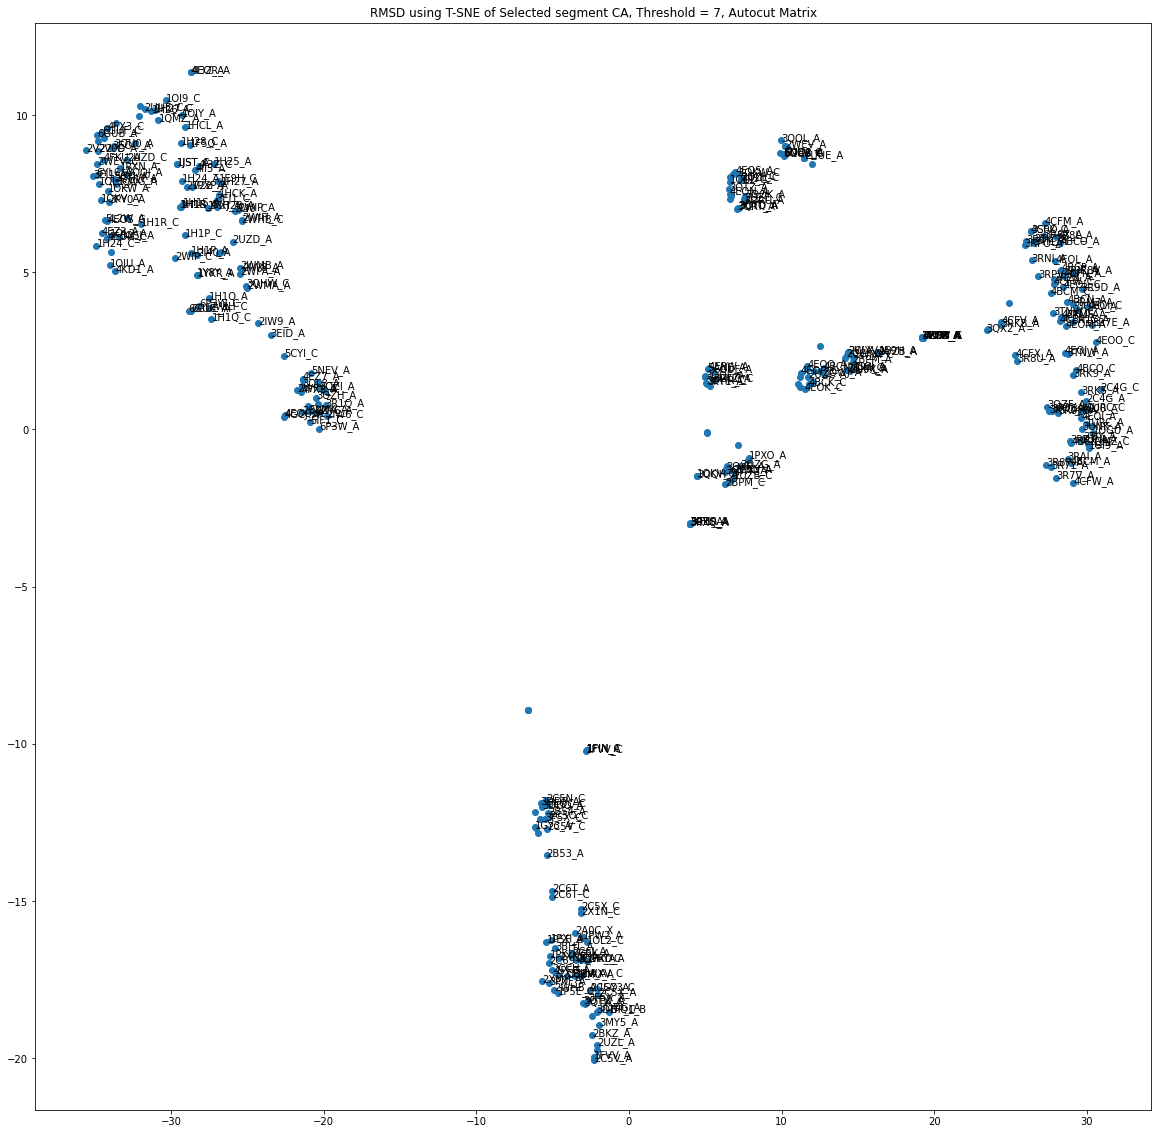

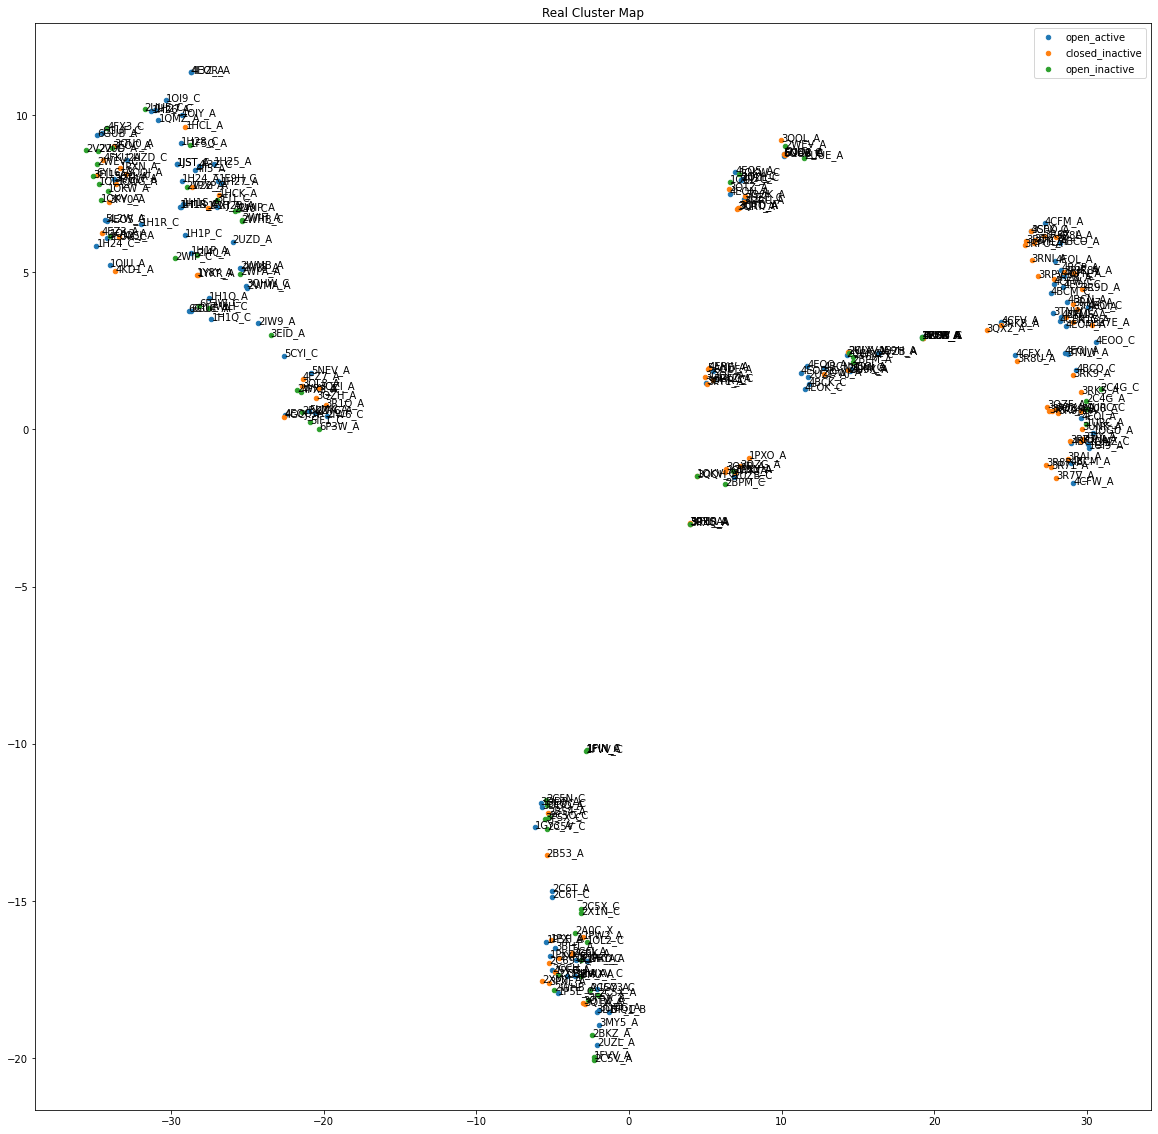

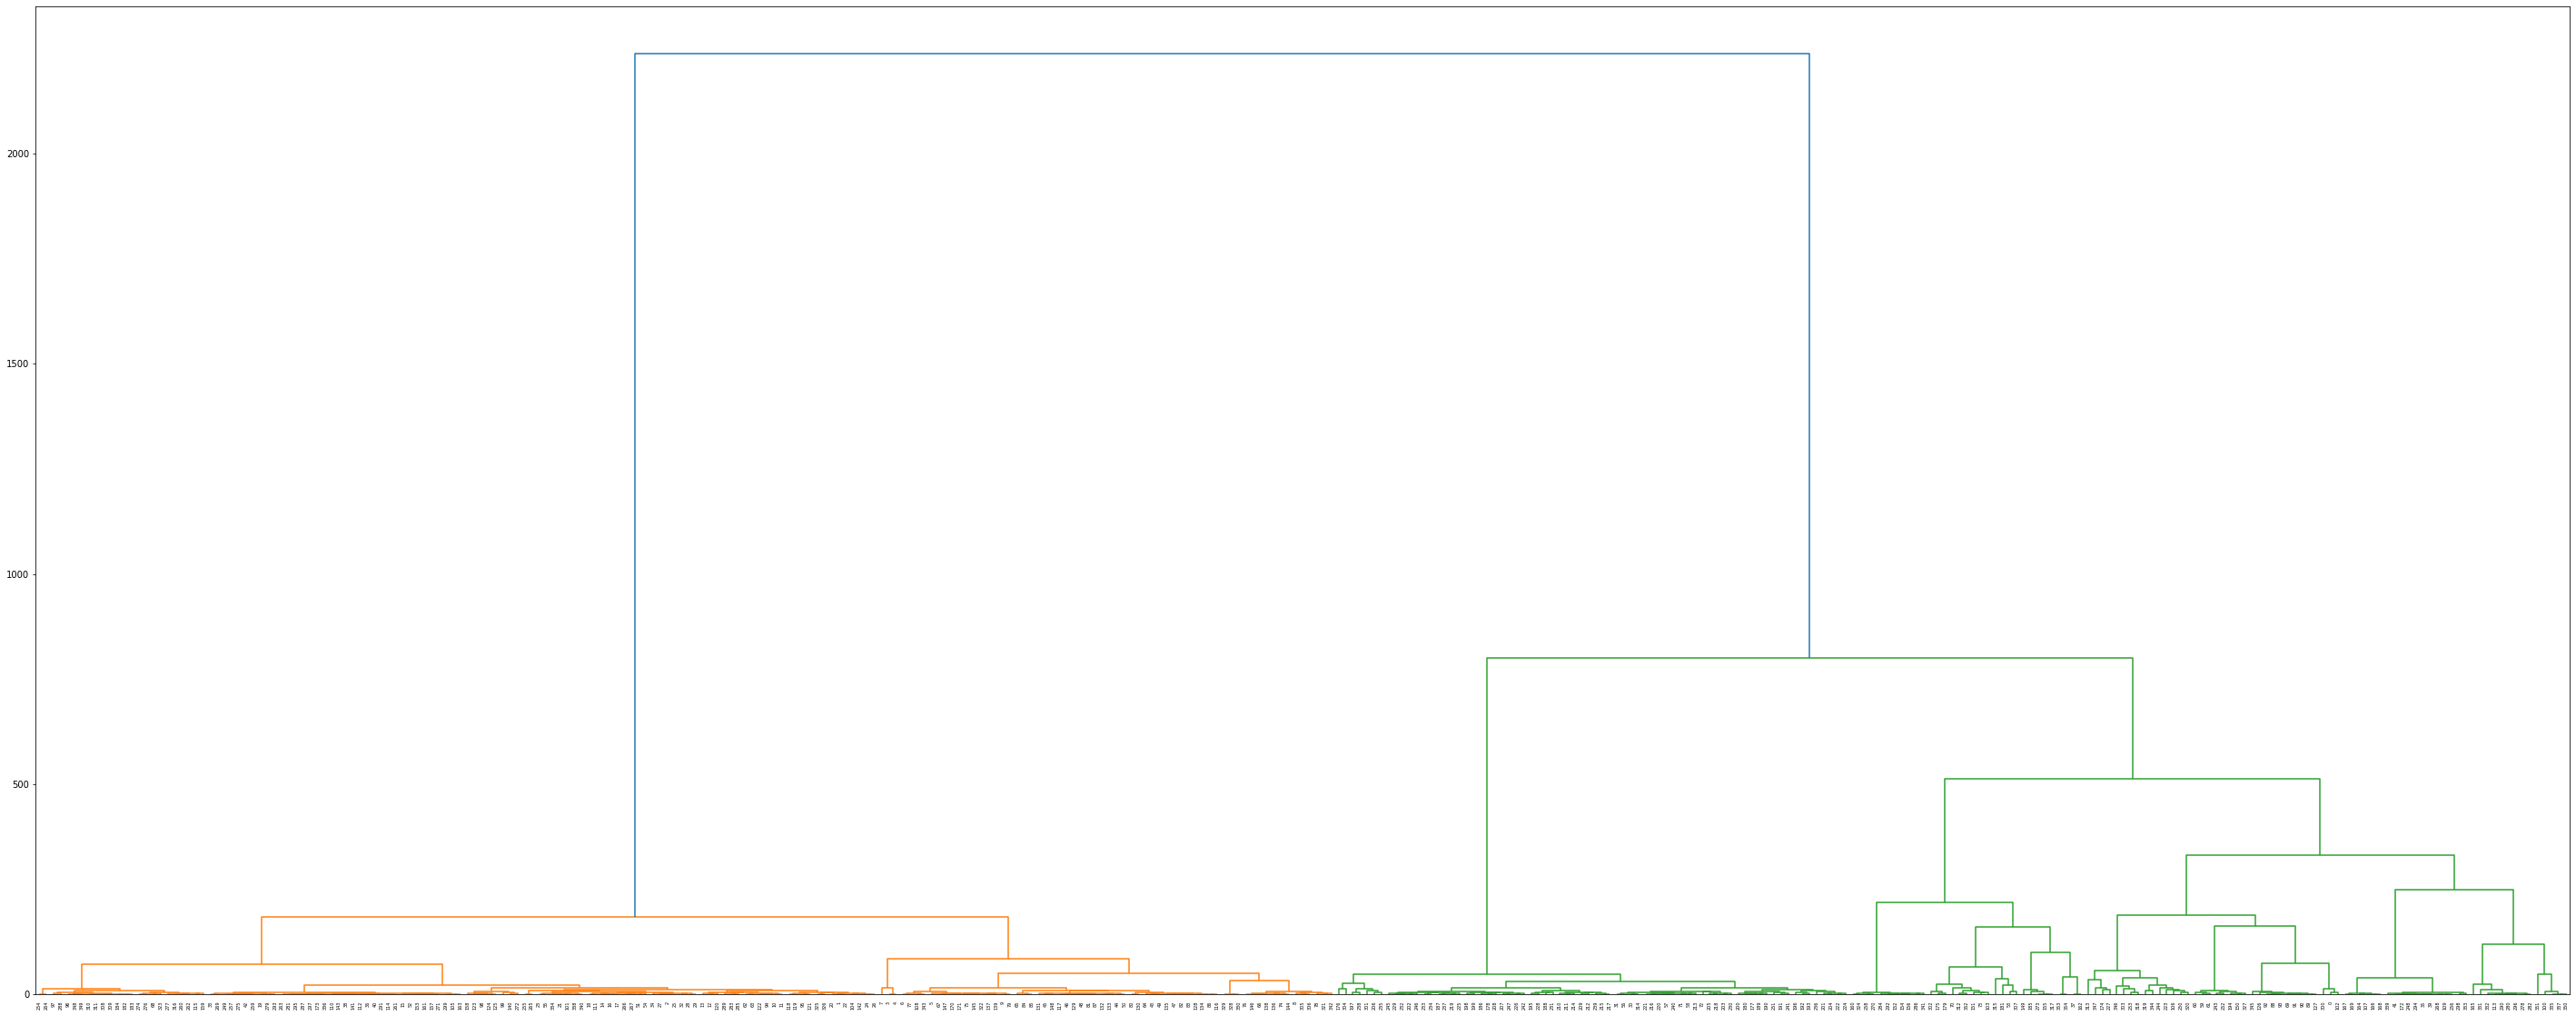

Dendrogram plotted
tree: Left Most Tree
tree: Middle Tree
Make sure the tree is just right of the previous tree or else the statistics will be inaccurate
tree1: ['l', 'l'], tree2: ['l', 'r']
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 118
cluster 1, length: 64
cluster 2, length: 173
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
open_active       0.490000  0.392000  0.435556
open_inactive     0.400000  0.323529  0.357724
closed_inactive   0.467153  0.646465  0.542373
Averages          0.452384  0.453998  0.445217
out:
                            Real open_active  Real open_inactive  Real closed_inactive
Predicted open_active                    49                  29                    22
Predicted open_inactive                  20               

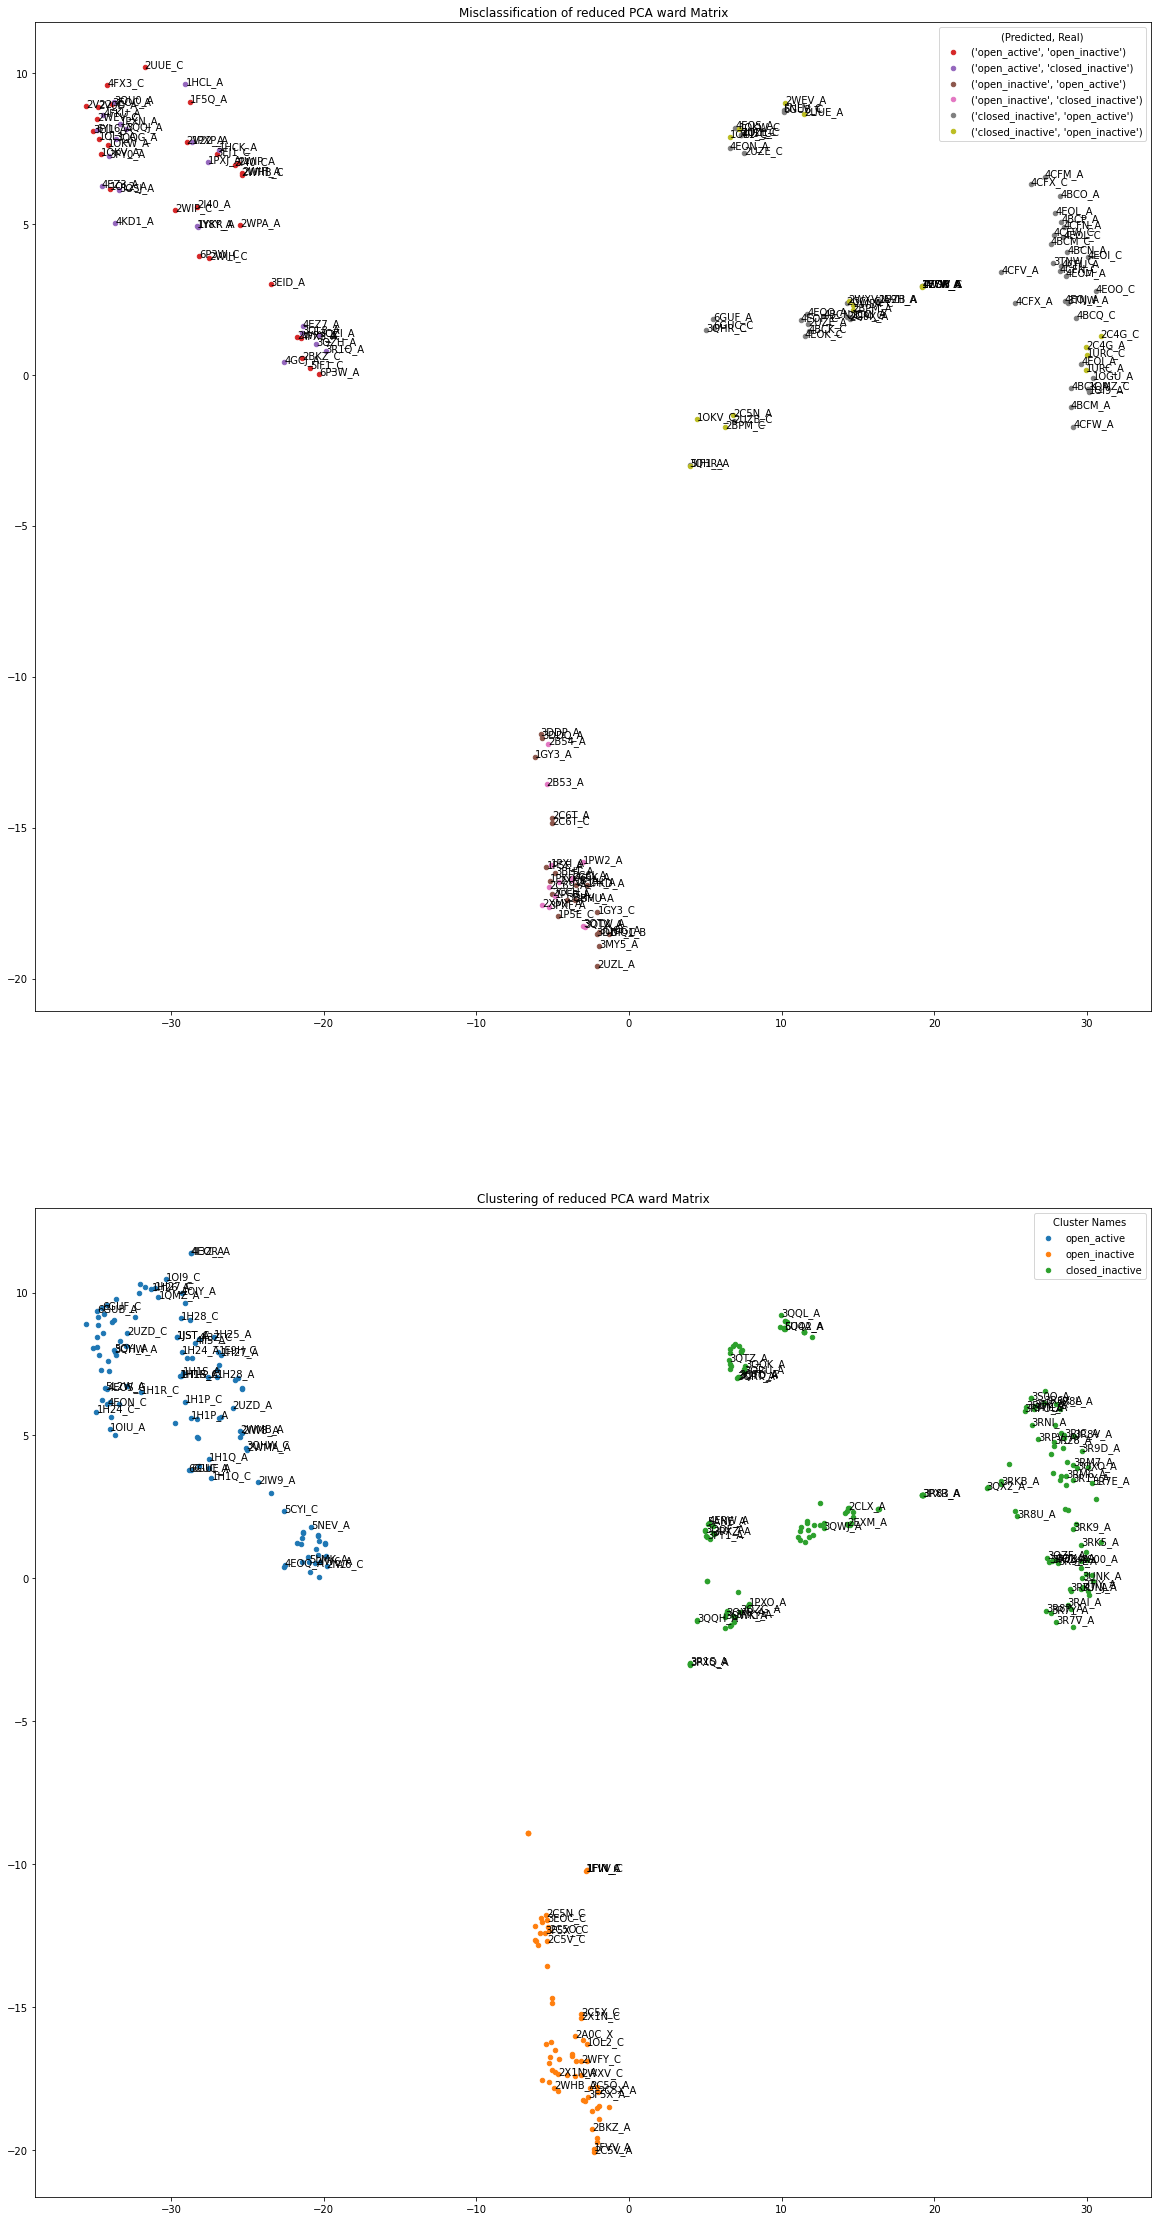

(#missing residues, percentage) [(0, 0.4494949494949495), (1, 0.5), (2, 0.2), (3, 0.43478260869565216), (4, 0.4578313253012048), (5, 0.375), (6, 0.6363636363636364), (8, 0.25), (9, 0.0), (10, 0.8), (11, 0.3333333333333333), (12, 0.0)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [89, 1, 3, 10, 38, 3, 7, 0, 1, 0, 4, 1, 0]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [198, 2, 15, 23, 83, 8, 11, 0, 4, 2, 5, 3, 1]


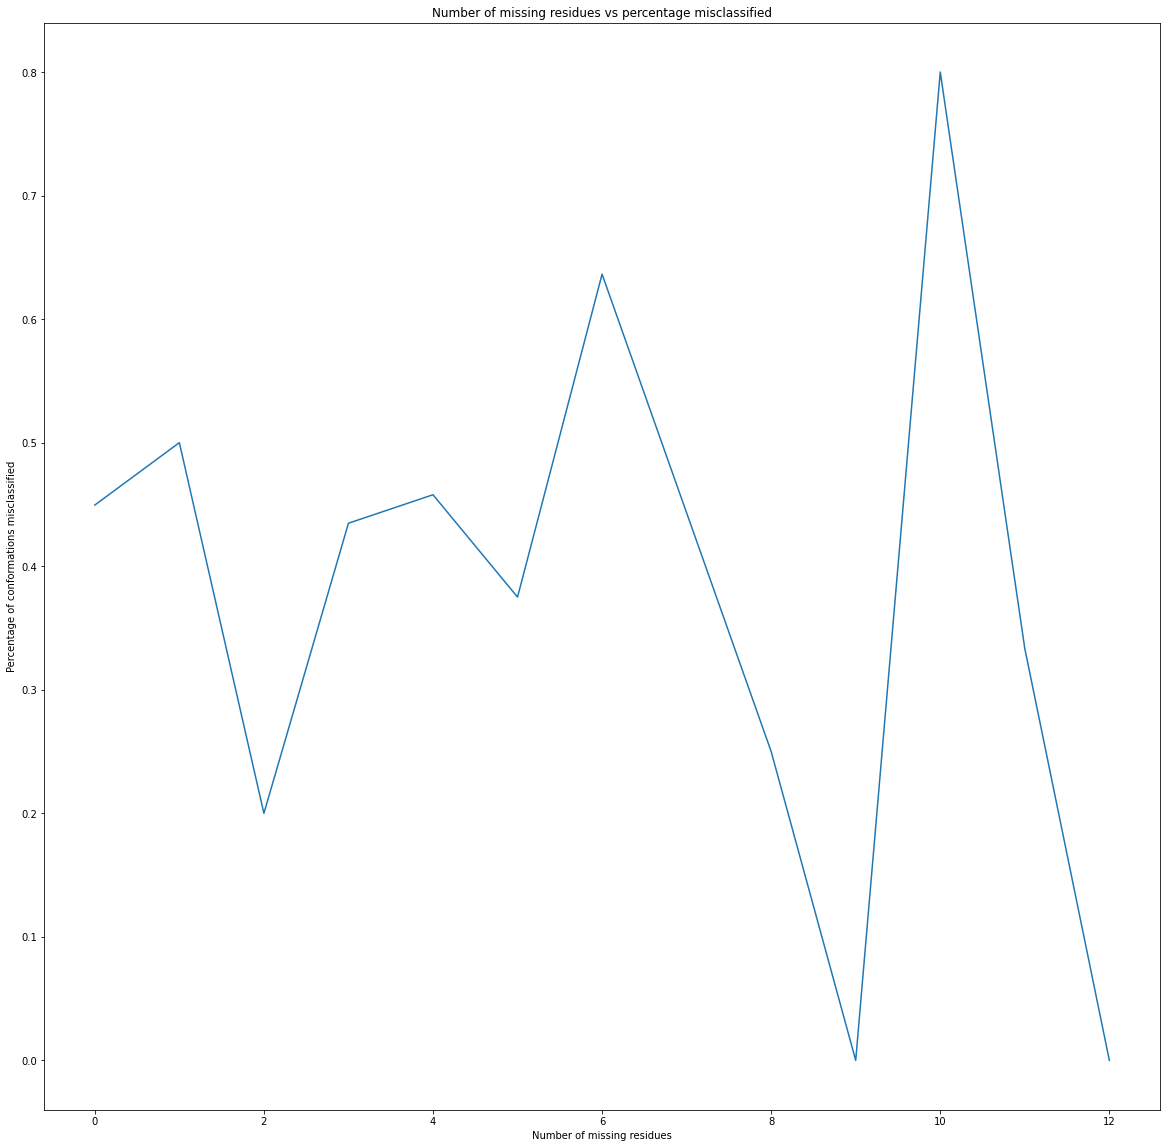

In [ ]:
info(matrix_seg,"Selected segment CA, Threshold = 7, Autocut", reduced_chains_list,annotated_dict_list,complete= False, hierarchy_method = "ward", no_clusters=3,tsne=True,auto_cut_tree=False)